![Imgur](https://i.imgur.com/5rtbtpN.png)


### <div style="font-family: Futura; letter-spacing: 8px; text-align: center; color: #000000; font-size: 100%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; box-shadow: rgb(204, 219, 232) 3px 3px 6px 0px inset, rgba(255, 255, 255, 0.5) -3px -3px 6px 1px inset;" > COMPLETE UNIVARIATE DATA VISUALIZATION</div>

This notebook aims to provide a comprehensive guide to visualizing single-variable distributions. We will explore various plotting techniques and libraries, primarily using Seaborn (sns) for static plots and Plotly for interactive plots.

### What is Univariate Data Visualization?
Univariate data visualization focuses on understanding the distribution, frequency, and behavior of a single variable within a dataset. This type of analysis is crucial in data science as it provides an insight into the characteristics of each variable, often revealing underlying patterns, outliers, or anomalies that could inform further analysis.

### Why Seaborn and Plotly?
Seaborn is a Python visualization library based on Matplotlib that offers an attractive interface for creating a wide range of static plots. Its high-level interface is designed to make it easy to generate informative and attractive visual representations of data.

Plotly, on the other hand, is a graphing library that makes interactive, publication-quality graphs online. It's incredibly versatile, allowing users to create plots that can be interacted with and explored, providing a deeper level of engagement with the data.

### Structure of This Notebook
1. **Getting Started**: We'll begin by setting up our environment, loading the data, and preparing it for visualization.
2. **Exploring Variables with Seaborn**: Each univariate plot using Seaborn will be accompanied by an explanation of when and how to use the plot effectively.
3. **Interactive Visualizations with Plotly**: We'll recreate the plots in Plotly, demonstrating how to leverage interactivity to gain additional insight from the same data.
4. **Comparing Insights**: We'll compare the insights gained from static plots versus interactive plots and discuss the advantages of each approach.
5. **Tips and Best Practices**: Throughout the notebook, we'll share helpful tips for effective data visualization and common pitfalls to avoid.
By the end of this notebook, you'll have a firm grasp of how to visualize univariate distributions effectively and how to choose the right tool for the right job.

Let's dive into the data and start visualizing!

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 70%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-40px" >IMPORTING DATASET</div>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

dataset_url = '/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_extended.csv'
df = pd.read_csv(dataset_url)

# Define the numerical and categorical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_columns = ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']
palette = ['#40A4BA', '#49535F', '#EB8151', '#1B527F', '#A0AFC6', '#8DCFD7']

df

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0     Adelie  Biscoe            53.4           17.8              219.0   
1     Adelie  Biscoe            49.3           18.1              245.0   
2     Adelie  Biscoe            55.7           16.6              226.0   
3     Adelie  Biscoe            38.0           15.6              221.0   
4     Adelie  Biscoe            60.7           17.9              177.0   
...      ...     ...             ...            ...                ...   
3425  Gentoo  Biscoe            44.0           20.4              252.0   
3426  Gentoo  Biscoe            54.5           25.2              245.0   
3427  Gentoo  Biscoe            51.4           20.4              258.0   
3428  Gentoo  Biscoe            55.9           20.5              247.0   
3429  Gentoo  Biscoe            43.9           22.9              206.0   

      body_mass_g     sex   diet life_stage health_metrics  year  
0          5687.0  female   fish      adult     overweight  2021  
1          6811.0  female   fish      adult     overweight  2021  
2          5388.0  female   fish      adult     overweight  2021  
3          6262.0  female   fish      adult     overweight  2021  
4          4811.0  female   fish   juvenile     overweight  2021  
...           ...     ...    ...        ...            ...   ...  
3425       6447.0    male  squid      adult        healthy  2025  
3426       6872.0    male  squid      adult        healthy  2025  
3427       7409.0    male  squid      adult     overweight  2025  
3428       6491.0    male  squid      adult        healthy  2025  
3429       6835.0    male  squid      adult        healthy  2025  

[3430 rows x 11 columns]

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-20px" >HISTOGRAM</div>

### Seaborn

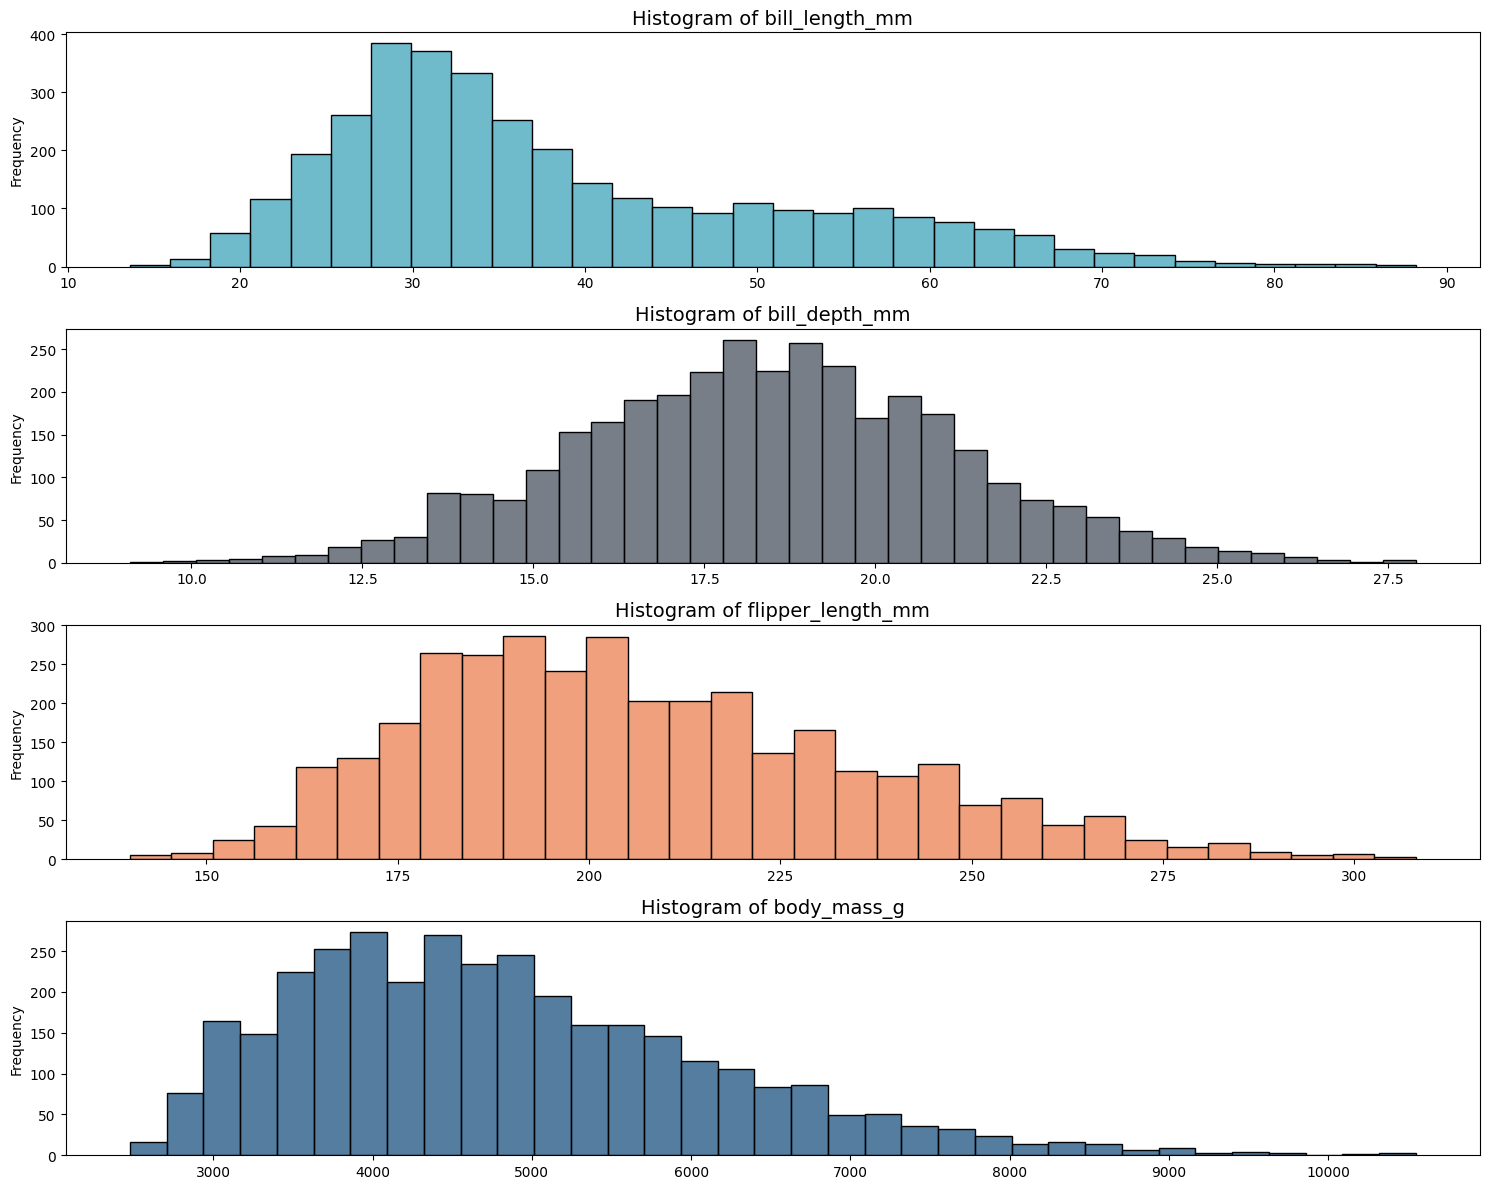

In [2]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(15, 12))

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i], color=palette[i % len(palette)], kde=False)
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Plotly

In [3]:
# Create subplots
fig = make_subplots(rows=len(numerical_columns), cols=1)

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(numerical_columns):
    fig.add_trace(
        go.Histogram(x=df[col], marker_color=palette[i % len(palette)], name=col),
        row=i+1, col=1
    )

# Update layout
fig.update_layout(height=1200, width=1000, title_text="Histograms of Numerical Columns")
fig.show()

<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **histogram** is a type of graph used in statistics to represent the distribution of numerical data. It is a very informative visual tool to illustrate the underlying frequency distribution (shape) of a set of continuous data.

### How a Histogram Works

A histogram consists of:

- **Vertical bars**: Each bar's height corresponds to the frequency of data within a certain range.
- **Bins (or buckets)**: These are intervals that represent the width of each bar on the horizontal axis. 

The entire range of data is divided into a series of intervals, and the count of how many values fall into each interval is represented by the height of a bar.

### Characteristics of a Histogram

- It displays the shape and spread of continuous data.
- The area of each bar is proportional to the frequency of items found within each bin.
- Unlike bar charts, histograms have no gaps between the bars, unless a bin has a frequency of zero.
- It can be used to determine the central tendency, variability, skewness, and kurtosis of the data's distribution.

### When to Use a Histogram

Use a histogram when:

- You have numerical data and want to see its distribution.
- You are interested in the underlying frequency distribution of the data.
- You want to visualize large data sets. It's more efficient than using a box plot or dot plot for big data.

Histograms are a fundamental part of statistical analysis and data exploration as they provide a quick way to understand the distribution and possible outliers in the data.
</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >BAR CHART</div>

### Seaborn

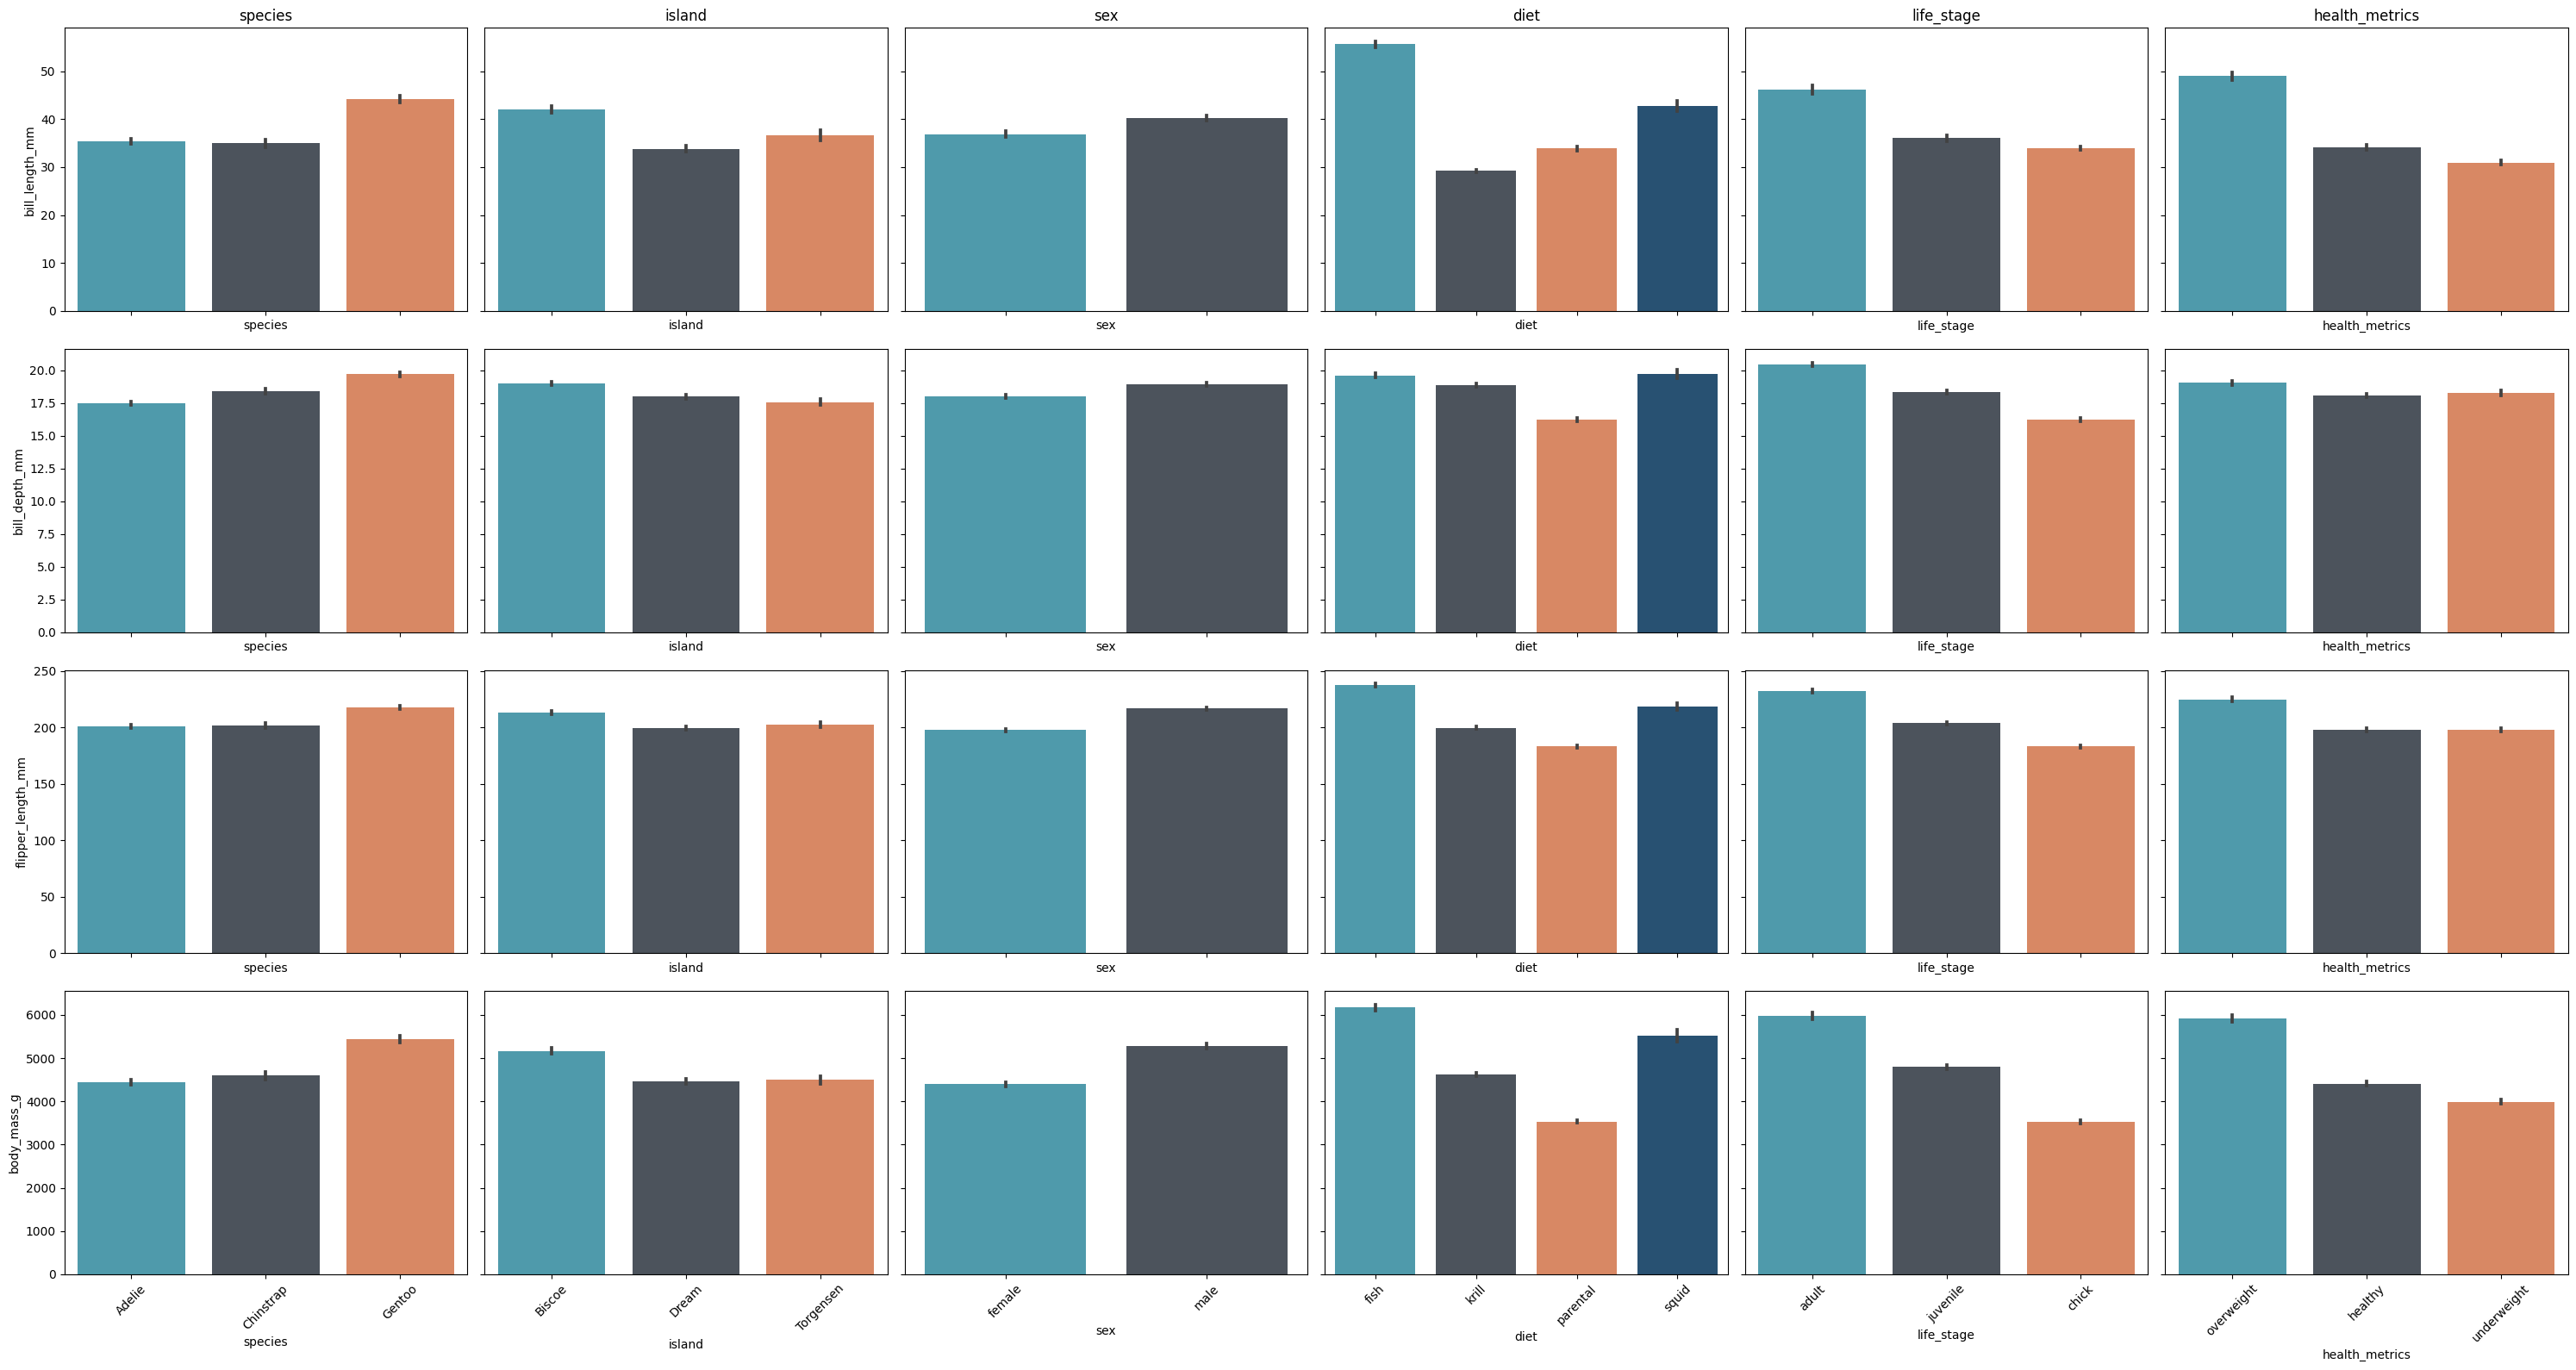

In [4]:
# Set up the matplotlib figure
num_rows = len(numerical_columns)
num_cols = len(categorical_columns)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows), sharex='col', sharey='row')

# Iterate over the rows and columns and create a bar plot for each
for i, num in enumerate(numerical_columns):
    for j, cat in enumerate(categorical_columns):
        sns.barplot(ax=axes[i, j], x=cat, y=num, data=df, palette=palette)
        if i == 0:  # Only set the title for the top row
            axes[i, j].set_title(cat)
        if j == 0:  # Only set the y-axis label for the first column
            axes[i, j].set_ylabel(num)
        else:
            axes[i, j].set_ylabel('')  # Clear the y-axis label for other columns to avoid duplication

# Adjust the x-axis labels
for ax in axes[-1, :]:  # Only the last row
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate the labels to prevent overlap

plt.tight_layout()
plt.show()

### Plotly

In [5]:
# Create a subplot grid
fig = make_subplots(rows=len(numerical_columns), cols=len(categorical_columns), 
                    shared_xaxes=True, shared_yaxes=True, 
                    subplot_titles=[cat for cat in categorical_columns * len(numerical_columns)])

for i, num in enumerate(numerical_columns, start=1):
    for j, cat in enumerate(categorical_columns, start=1):
        # Add traces
        df_filtered = df[[cat, num]].dropna()
        for group, color in zip(df_filtered[cat].unique(), palette):
            df_group = df_filtered[df_filtered[cat] == group]
            fig.add_trace(go.Bar(x=[group], y=[df_group[num].mean()], 
                                 name=group, marker_color=color), 
                          row=i, col=j)

# Set y-axis titles
for i, num in enumerate(numerical_columns, start=1):
    fig.update_yaxes(title_text=num, row=i, col=1)

# Update xaxis properties
fig.update_xaxes(tickangle=45)

# Update layout to adjust for subplot titles and set the figure size if necessary
fig.update_layout(
    height=800, 
    width=1200, 
    title_text="Matrix of bar plots",
    showlegend=False
)

fig.show()

<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **bar chart** is a graphical display of data using bars of different heights. It's one of the most common types of graph used to make comparisons between groups.

### How a Bar Chart Works

In a bar chart:

- Each **column** represents a group defined by a categorical variable.
- The **height** of the bar represents the value or count of that category.
- The bars can be displayed **horizontally** or **vertically**.

### Characteristics of a Bar Chart

- Bars can be used to represent data related to counts, means, medians, or any measure of central tendency.
- The length or height of the bar is proportionate to the value it represents.
- There is usually space between each bar to highlight that categories are discrete (not continuous).

### When to Use a Bar Chart

Use a bar chart when:

- You have categorical data.
- You want to compare the frequency or value of different categories.
- You need to visualize differences among discrete groups.

Bar charts are versatile: they can be used for showing the relationship between a categorical and a numerical variable, or they can display one or several variables.

</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >PIE CHART</div>

### Matplotlib

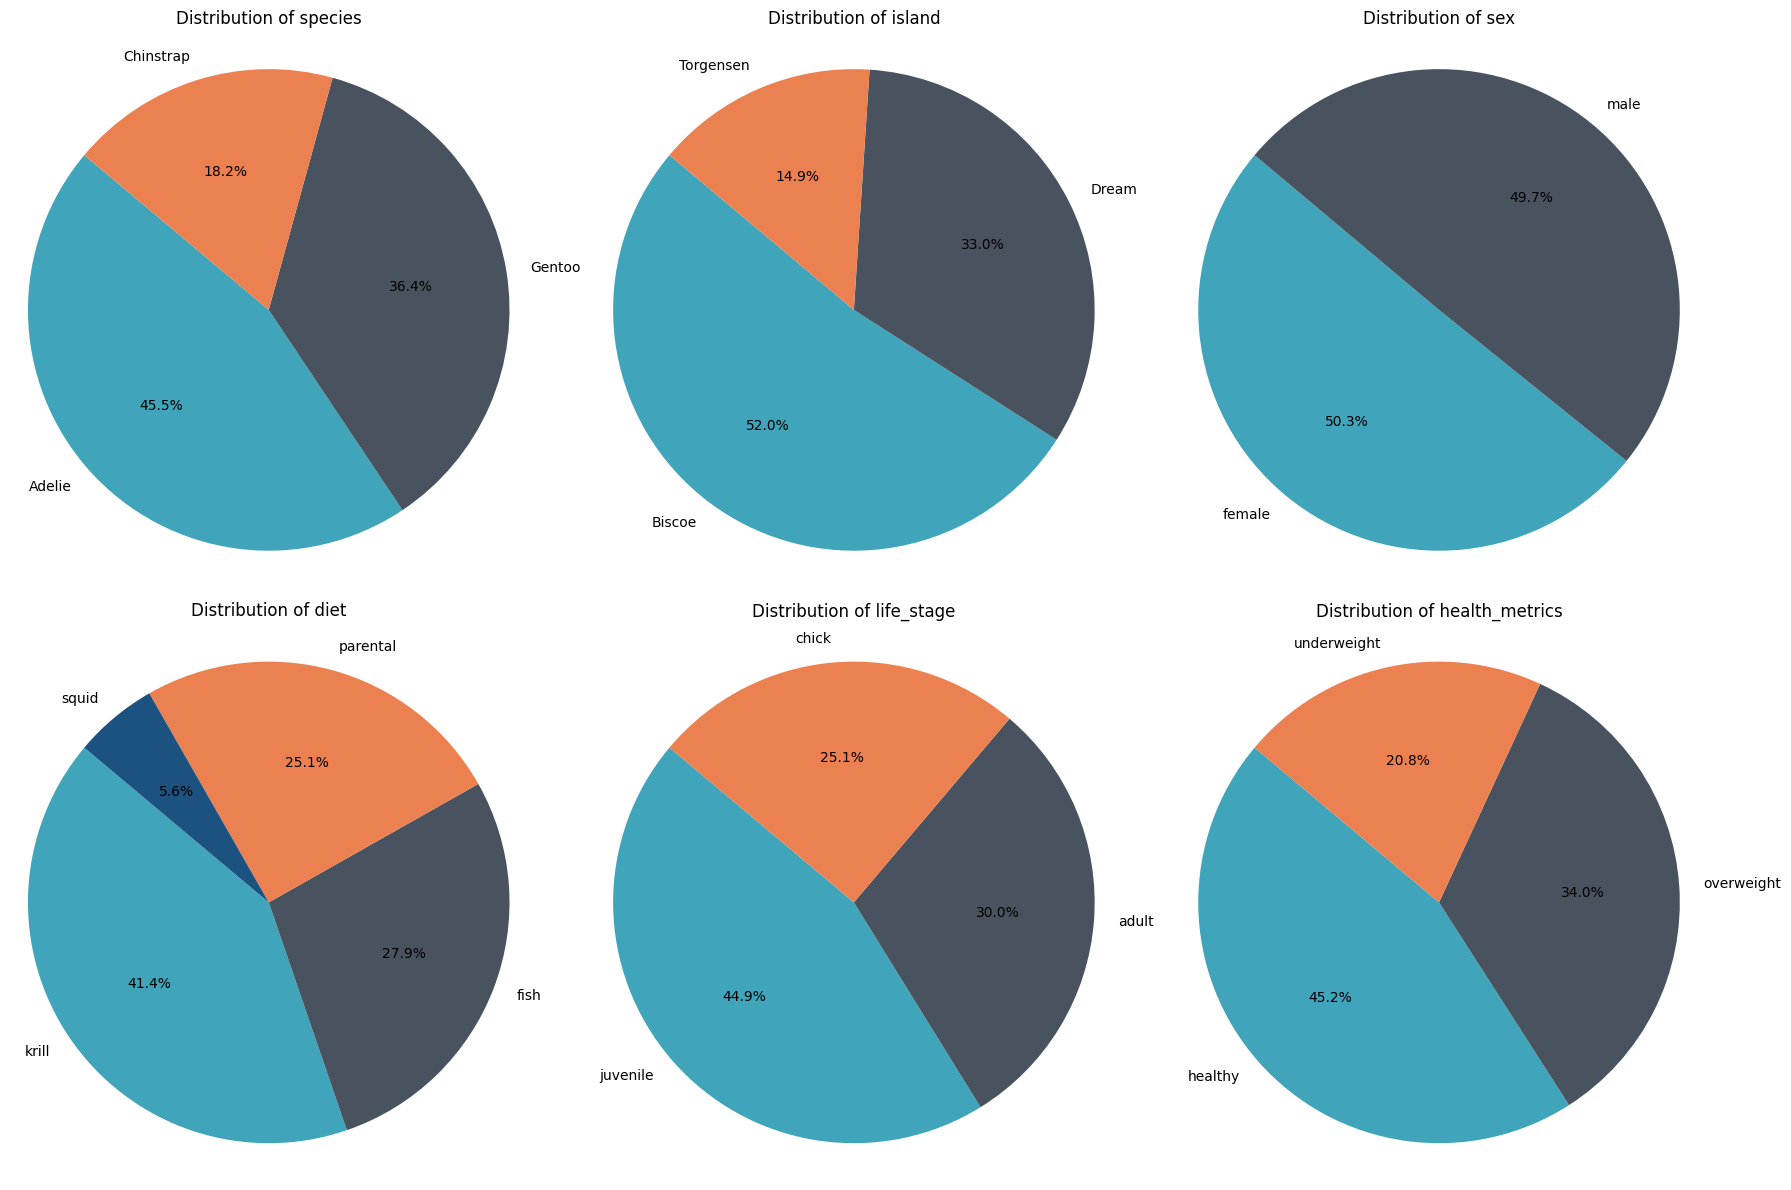

In [6]:
categorical_columns = ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']

# Calculate the number of subplot grid rows and columns (arrange them in 2 rows for this example)
num_rows = 2
num_cols = (len(categorical_columns) + 1) // num_rows  # This ensures at least two rows are used

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 6)) # Adjust the size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical columns and create a pie chart in each subplot
for i, column in enumerate(categorical_columns):
    data = df[column].value_counts()
    axes[i].pie(data, labels=data.index, colors=palette, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Hide any unused subplot axes if there are any
for j in range(i+1, num_rows*num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >


A **pie chart** is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. In a pie chart, each slice corresponds to a category and its size is proportional to the frequency or percentage of the category in the dataset.

### Characteristics of a Pie Chart

- **Slices**: Each slice of the pie chart represents a category from the dataset. The area of each slice is proportional to the quantity it represents.
- **Proportions**: The chart is useful for displaying the relative percentages of multiple classes of data.
- **Labels**: The slices are usually labeled with their corresponding category and can also contain the percentage or actual value they represent.
- **Color-coded**: The slices are often color-coded for easier differentiation and understanding.

### When to Use a Pie Chart

- When you want to show a simple proportion of categories.
- When you have a limited number of categories that add up to a whole.
- When the categories are nominal or categorical.

### Limitations of Pie Charts

- Not useful for large numbers of categories.
- Difficult to compare the sizes of slices, especially when the differences are small.
- Can be misleading if the slices are not ordered correctly.

</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >DOT PLOTS</div>

### Seaborn

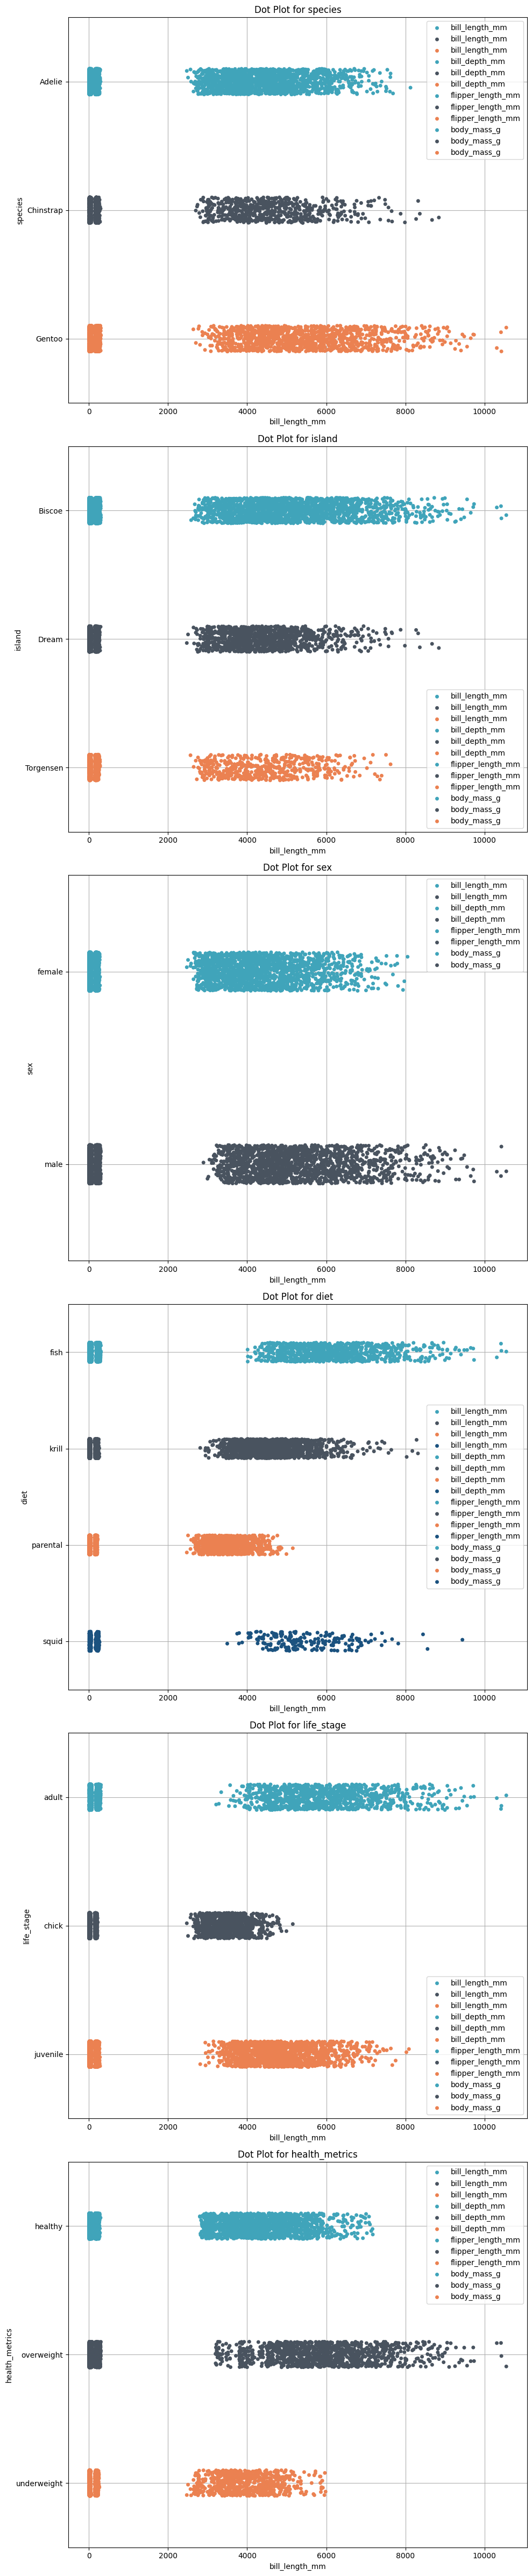

In [7]:
# Create a figure to hold the subplots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 8 * len(categorical_columns)))

# Flatten axes array if only one row
if len(categorical_columns) == 1:
    axes = [axes]

for ax, cat_col in zip(axes, categorical_columns):
    # Create a new DataFrame to plot, sorted by the current categorical column for clarity
    sorted_df = df.sort_values(by=cat_col, ascending=True)

    for num_col in numerical_columns:
        sns.stripplot(x=num_col, y=cat_col, data=sorted_df, ax=ax, palette = palette, jitter=True, label=num_col)

    ax.set_title(f'Dot Plot for {cat_col}')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >


A **dot plot** is a statistical chart consisting of data points plotted on a simple scale, typically using filled circles. It is used to display the frequency distribution of small to moderate-sized datasets and identify patterns, trends, clusters, and outliers.

### Characteristics of a Dot Plot

- **Data Points**: Individual data points are represented as dots on the plot.
- **Scale**: The horizontal or vertical axis represents a scale that the dots are plotted against.
- **No Overlapping**: Dots representing different data points may be stacked, but do not overlap.
- **Groups and Categories**: Data can be grouped by category with different sections or colors representing different groups.

### When to Use a Dot Plot

- When you have a small to medium dataset.
- When you want to display the frequency of values in a dataset or compare two or three datasets.
- When the data is discrete (distinct and separate values).

### Limitations of Dot Plots

- Not ideal for large datasets because it can become cluttered and hard to read.
- May require more space than other types of charts to be clear and informative.

</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >BOX PLOTS</div>

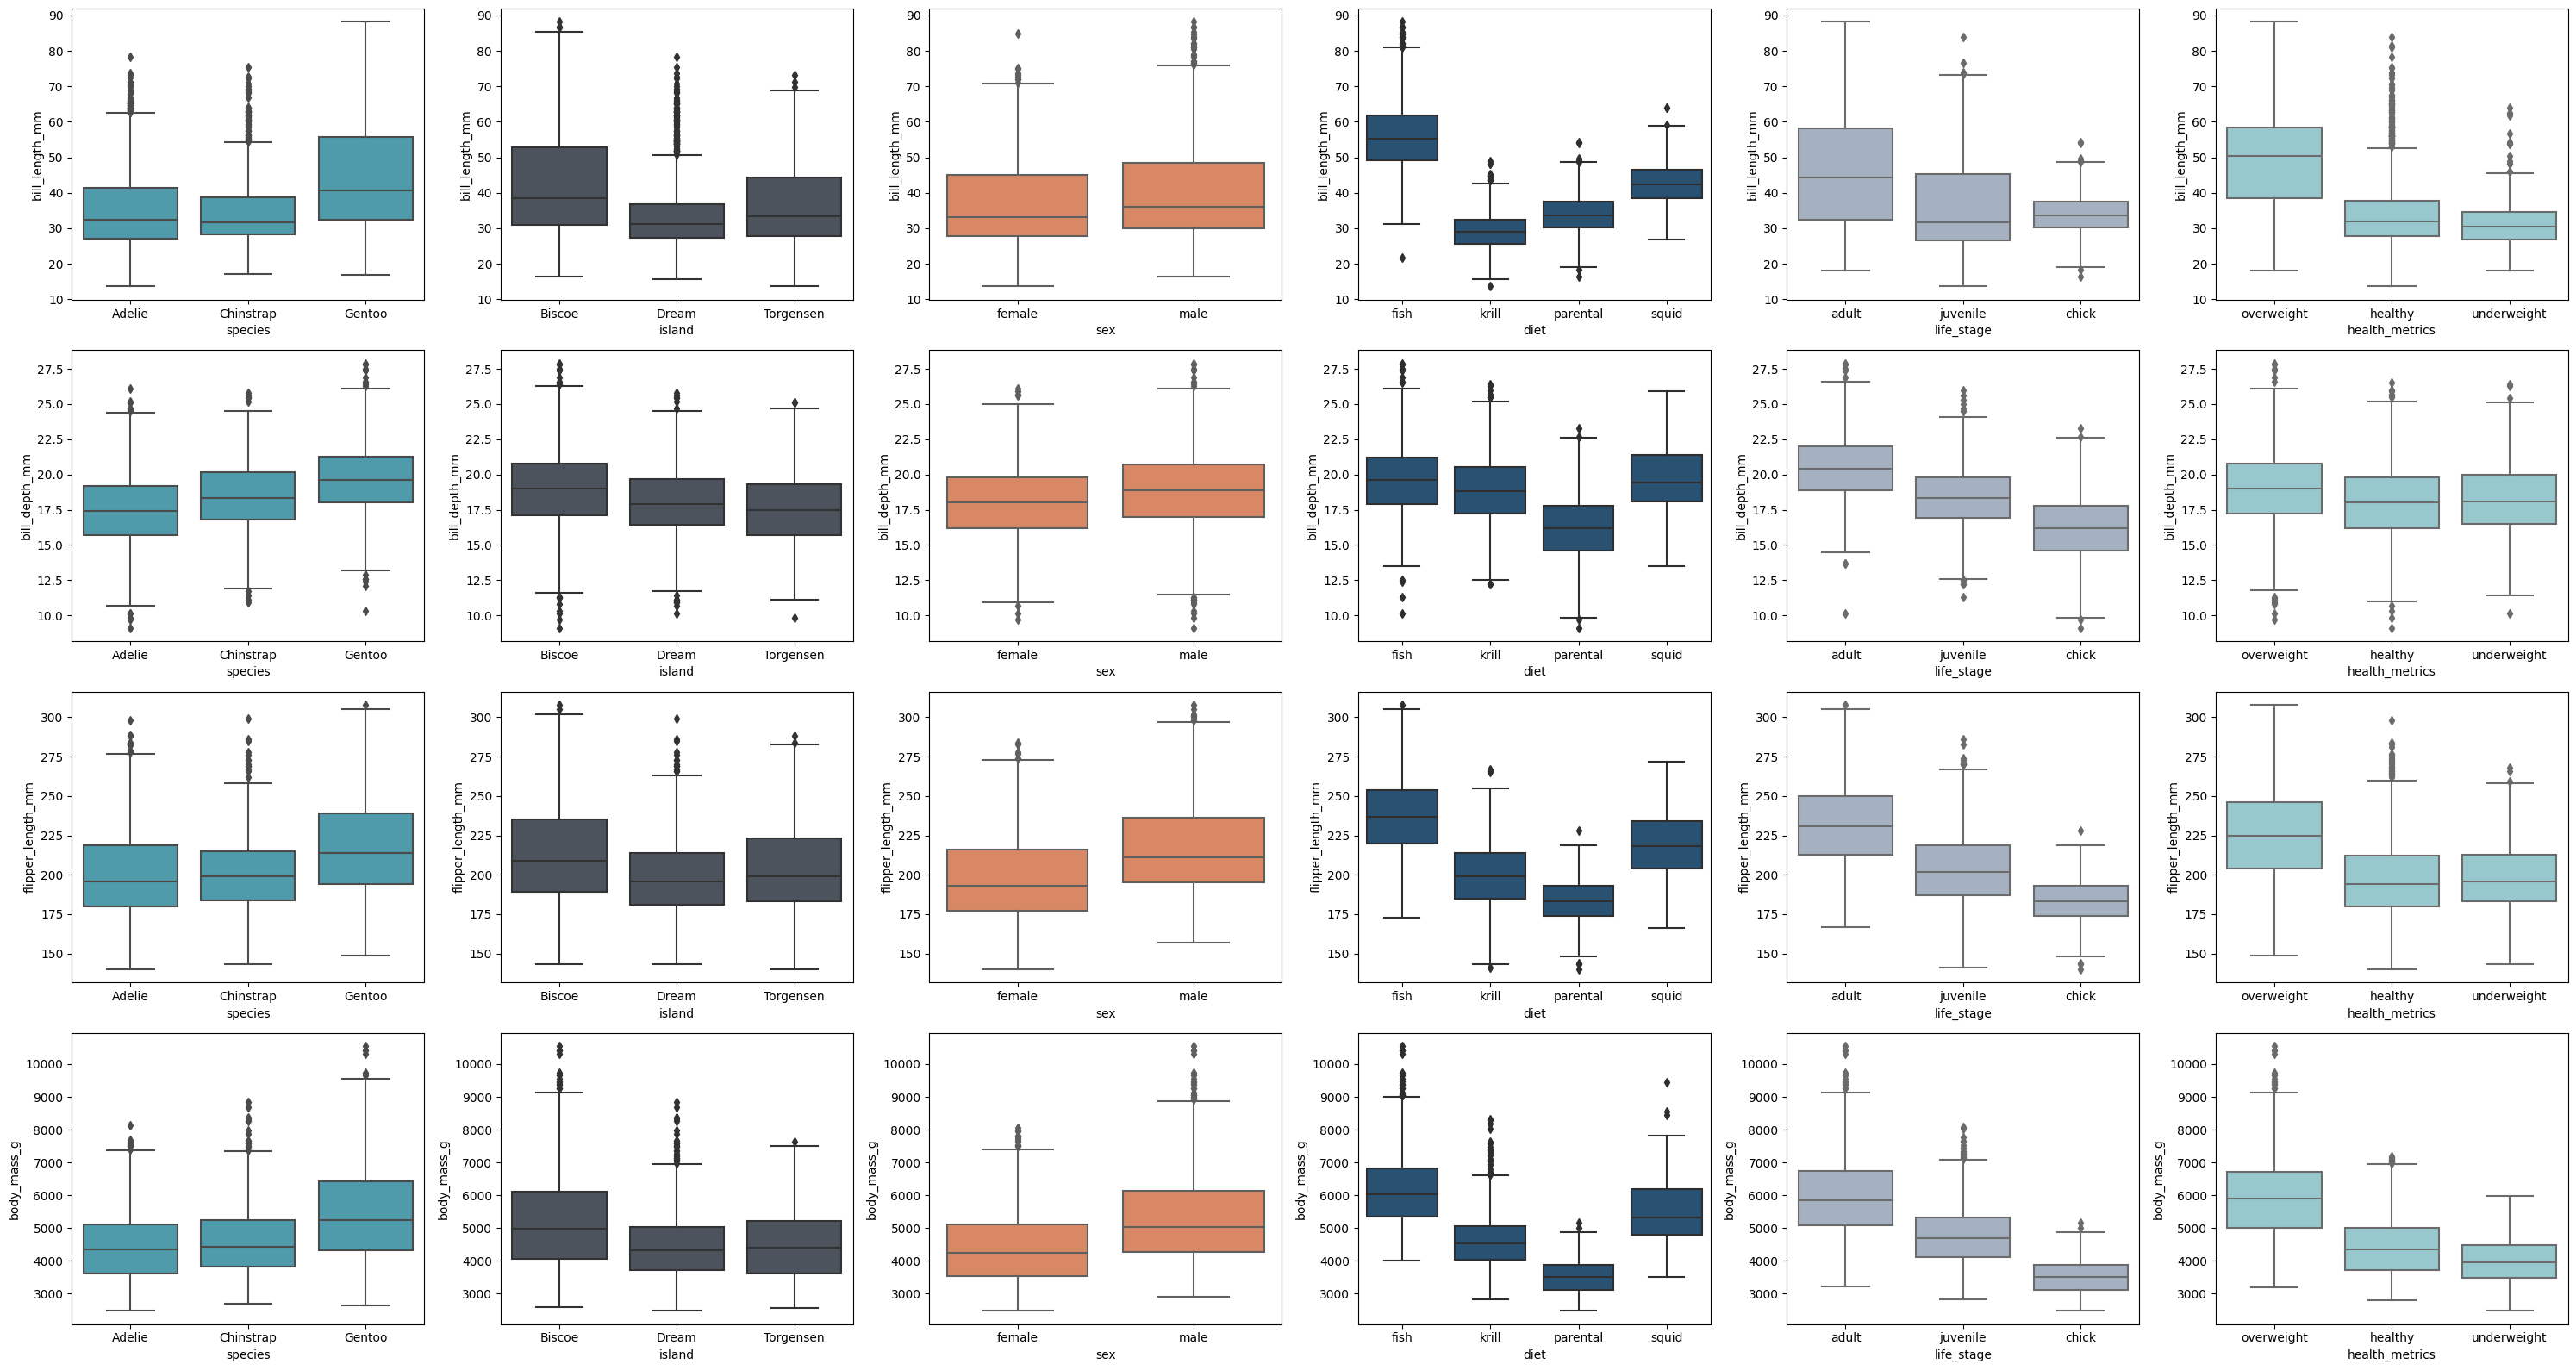

In [8]:
# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=len(categorical_columns), figsize=(5 * len(categorical_columns), 4 * len(numerical_columns)))

# Flatten the axes array if there is only one row or one column
if len(numerical_columns) == 1:
    axes = [axes]
axes = [ax if isinstance(ax, np.ndarray) else [ax] for ax in axes]  # Ensure it's a 2D list

# Generate a color palette with a distinct color for each numerical column
#palette = sns.color_palette("hsv", len(categorical_columns))

# Plotting the box plots
for i, num_col in enumerate(numerical_columns):
    for j, cat_col in enumerate(categorical_columns):
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=axes[i][j], palette=[palette[j]])

# Adjust the layout
plt.tight_layout()
plt.show()


### Plotly

In [9]:
# Create subplots, with one row per numerical column and one column per categorical column
fig = make_subplots(rows=len(numerical_columns), cols=len(categorical_columns),
                    subplot_titles=[f"{num_col} by {cat_col}" for num_col in numerical_columns for cat_col in categorical_columns])

# Generate the box plots
for i, num_col in enumerate(numerical_columns):
    for j, cat_col in enumerate(categorical_columns):
        # Get the data for plotting
        plot_data = df[[cat_col, num_col]].dropna()

        # Create the Box plot
        fig.add_trace(go.Box(
            y=plot_data[num_col],
            x=plot_data[cat_col],
            name=num_col,
            marker_color=palette[j % len(palette)]  # Cycle through colors
        ), row=i+1, col=j+1)

# Update layout
fig.update_layout(height=300 * len(numerical_columns), width=275 * len(categorical_columns), 
                  title_text="Box Plots of Numerical Columns by Categorical Columns", showlegend=False)

# Show figure
fig.show()

<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **box plot** (also known as a box-and-whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

### Components of a Box Plot:

- **Minimum**: The smallest data point excluding any outliers.
- **First Quartile (Q1)**: Median of the first half of the dataset, which is the 25th percentile.
- **Median (Q2)**: The middle value of the dataset, which is the 50th percentile.
- **Third Quartile (Q3)**: Median of the second half of the dataset, which is the 75th percentile.
- **Maximum**: The largest data point excluding any outliers.
- **Interquartile Range (IQR)**: The distance between the first and third quartiles (Q3 - Q1).
- **Whiskers**: The lines that extend from the top and bottom of the box to the maximum and minimum values, excluding outliers.
- **Outliers**: Data points that fall below Q1 - 1.5 IQR or above Q3 + 1.5 IQR are considered outliers and are often plotted as individual points.

### When to Use a Box Plot:

- To get a visual summary of data.
- To compare distributions between several groups or sets of data.
- To detect outliers or extreme values.

### Advantages of Box Plots:

- Summarizes variation in large datasets visually.
- Shows outliers and the "spread" of the data.
- Makes it easy to compare multiple distributions.
- Is compact and can be easily included in a dashboard or a composite multiple-chart display.

### Limitations of Box Plots:

- Does not show the distribution in as much detail as a histogram or kernel density plot.
- Can be more complex to interpret for non-technical audiences compared to bar charts or line charts.

</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >VIOLIN PLOTS</div>

### Seaborn

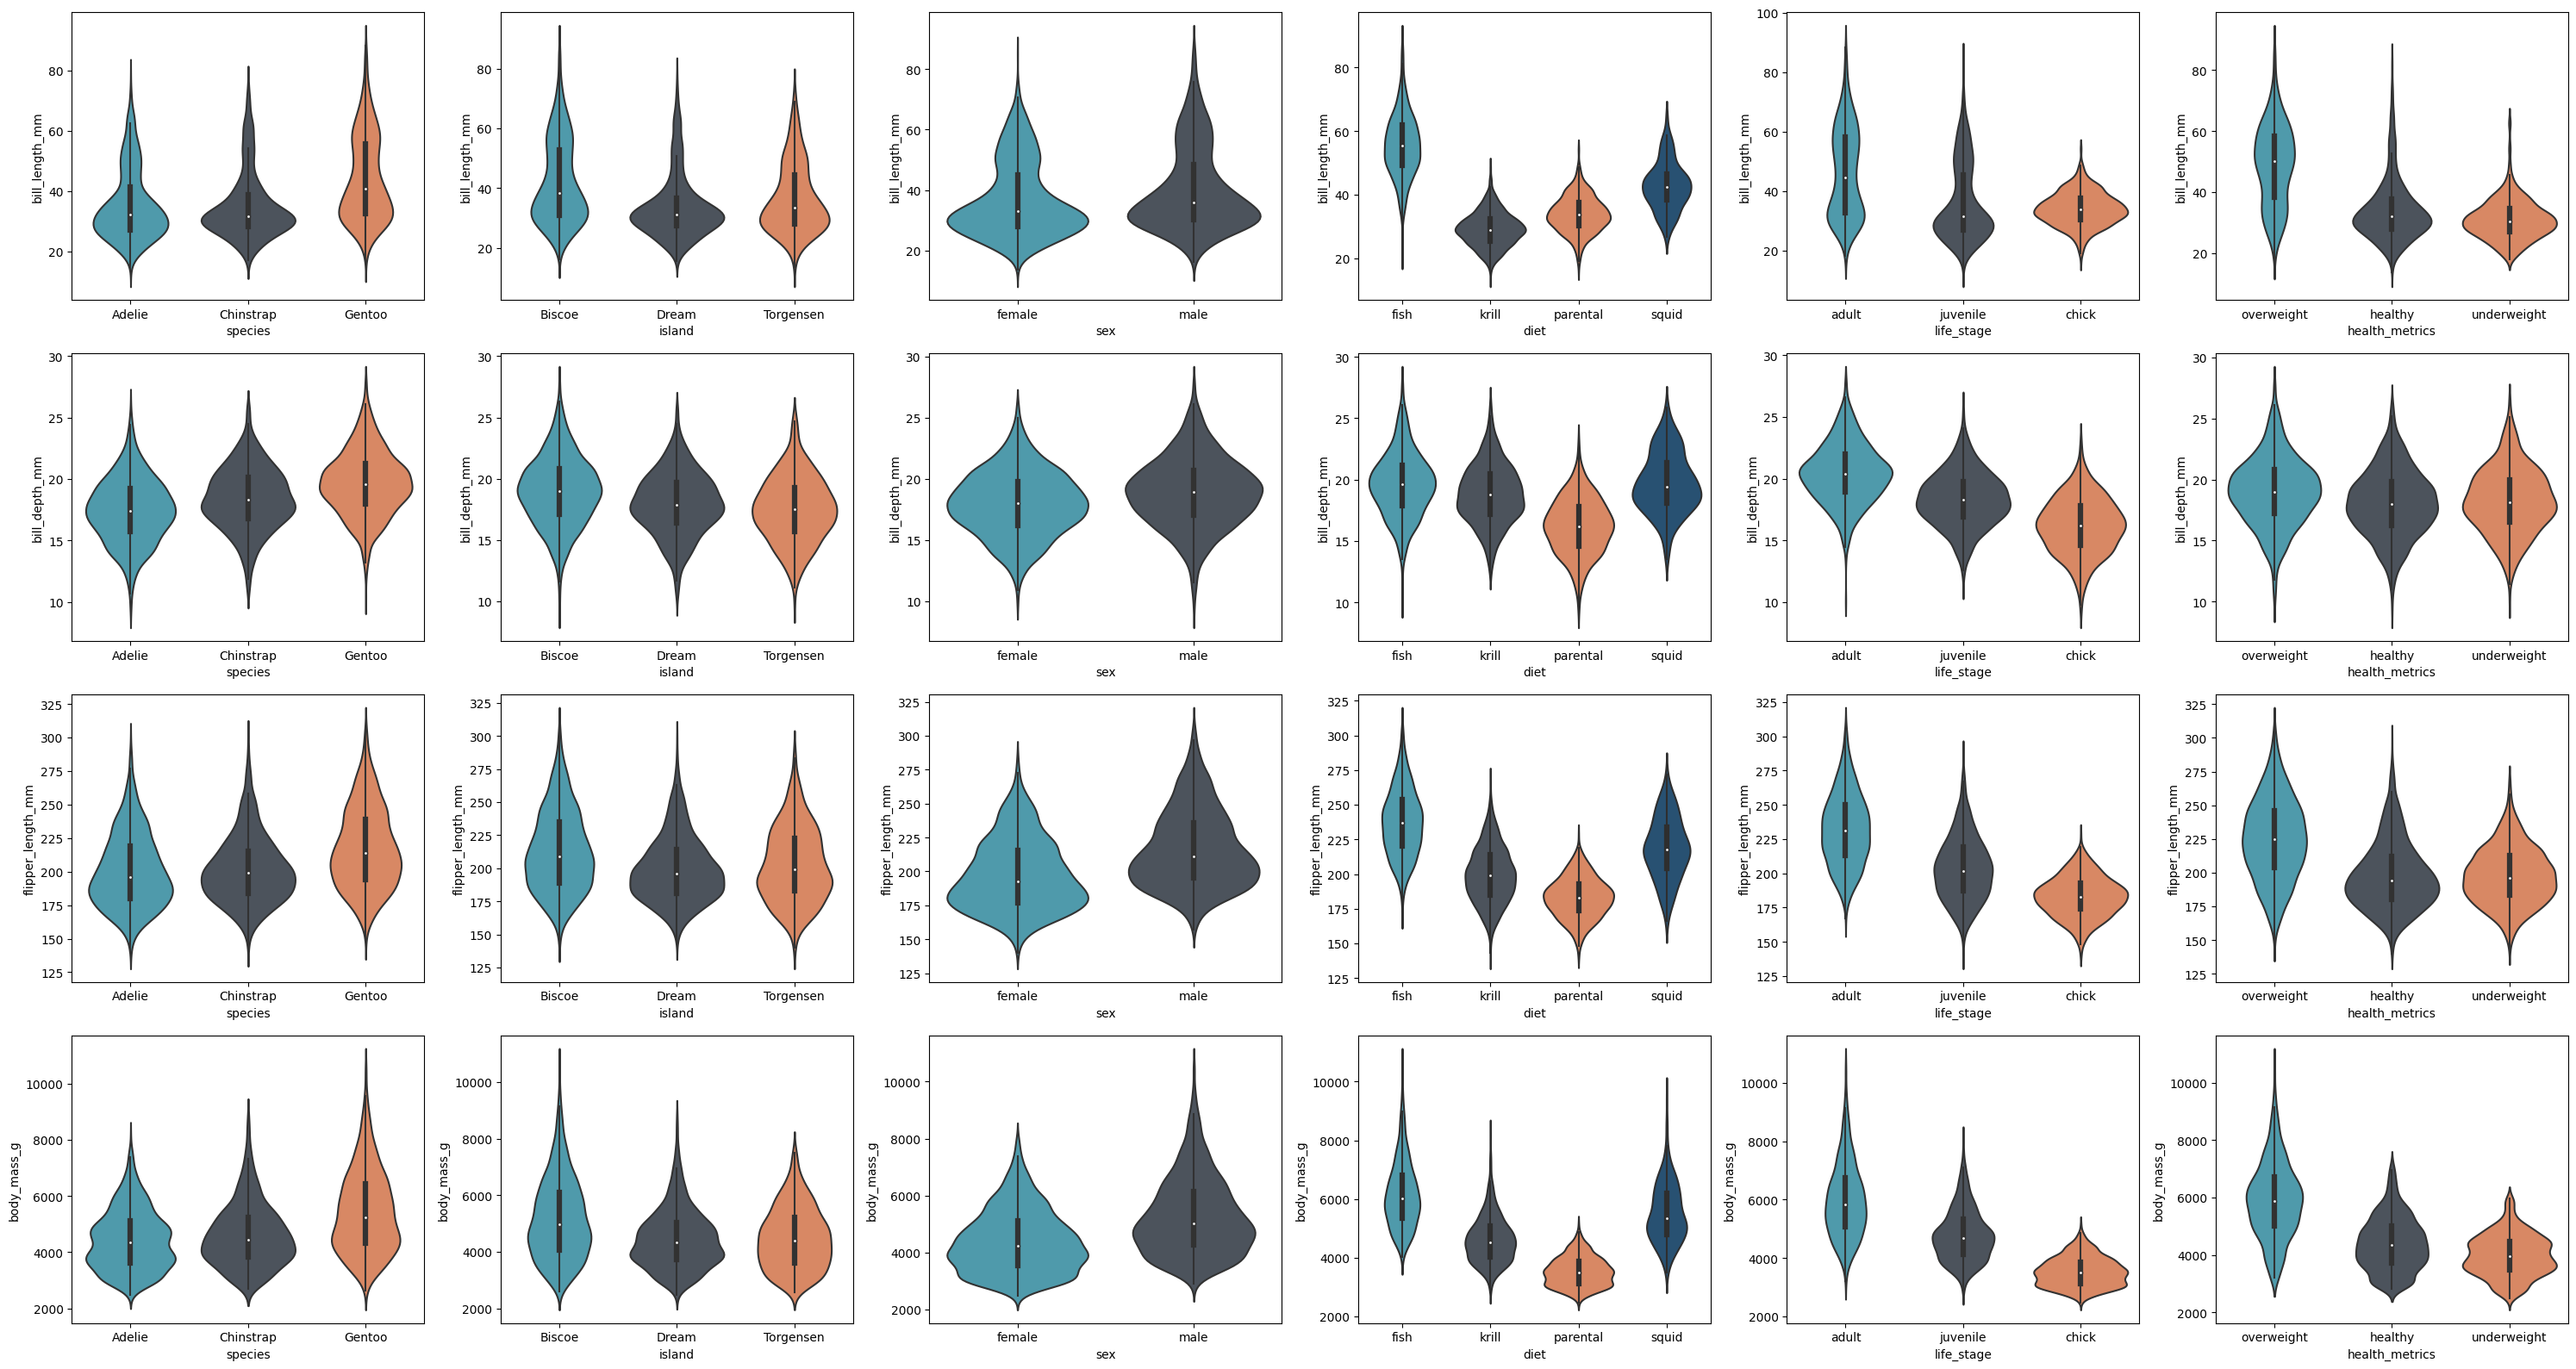

In [10]:
# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=len(categorical_columns), figsize=(5 * len(categorical_columns), 4 * len(numerical_columns)))


# Plotting the violin plots
for i, num_col in enumerate(numerical_columns):
    for j, cat_col in enumerate(categorical_columns):
        sns.violinplot(x=cat_col, y=num_col, data=df, ax=axes[i][j], palette=palette)

# Adjust the layout
plt.tight_layout()
plt.show()


### Plotly

In [11]:
# Create subplots, with one row per numerical column and one column per categorical column
fig = make_subplots(rows=len(numerical_columns), cols=len(categorical_columns),
                    subplot_titles=[f"{num_col} by {cat_col}" for num_col in numerical_columns for cat_col in categorical_columns])

# Generate the box plots
for i, num_col in enumerate(numerical_columns):
    for j, cat_col in enumerate(categorical_columns):
        # Get the data for plotting
        plot_data = df[[cat_col, num_col]].dropna()
        # Create the Violin plot
        fig.add_trace(go.Violin(
            y=plot_data[num_col],
            x=plot_data[cat_col],
            name=num_col,
            marker_color=palette[j % len(palette)]  # Cycle through colors
        ), row=i+1, col=j+1)

# Update layout
fig.update_layout(height=300 * len(numerical_columns), width=275 * len(categorical_columns), 
                  title_text="Box Plots of Numerical Columns by Categorical Columns", showlegend=False)

# Show figure
fig.show()

<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **violin plot** is a data visualization that combines features of a box plot and a kernel density plot. It is used to represent data distributions, providing insights into central tendency, spread, and skewness. 

### Components of a Violin Plot:

- **Violin Shape**: The central portion of the plot resembles a violin or mirrored density plot. It displays the probability density of data at different values along the y-axis. Wider sections indicate higher data density, while narrower sections indicate lower density.

- **Box Plot Inside**: Often, a box plot is included within the violin plot, conveying the same information as a traditional box plot, such as median, quartiles, and potential outliers.

### When to Use a Violin Plot:

- To visualize data distribution, especially when comparing multiple groups or categories.
- To illustrate data density at various values.
- To assess central tendency and data spread while also identifying potential outliers.

### Advantages of Violin Plots:

- Provides a compact visualization of both data distribution and summary statistics.
- Reveals data density, making it useful for identifying multimodal distributions or asymmetry.
- Suitable for side-by-side comparison of multiple distributions.

### Limitations of Violin Plots:

- May be less familiar to non-technical audiences compared to conventional box plots.
- Can become visually complex when dealing with a large number of categories or groups.


</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >BEAN PLOTS</div>

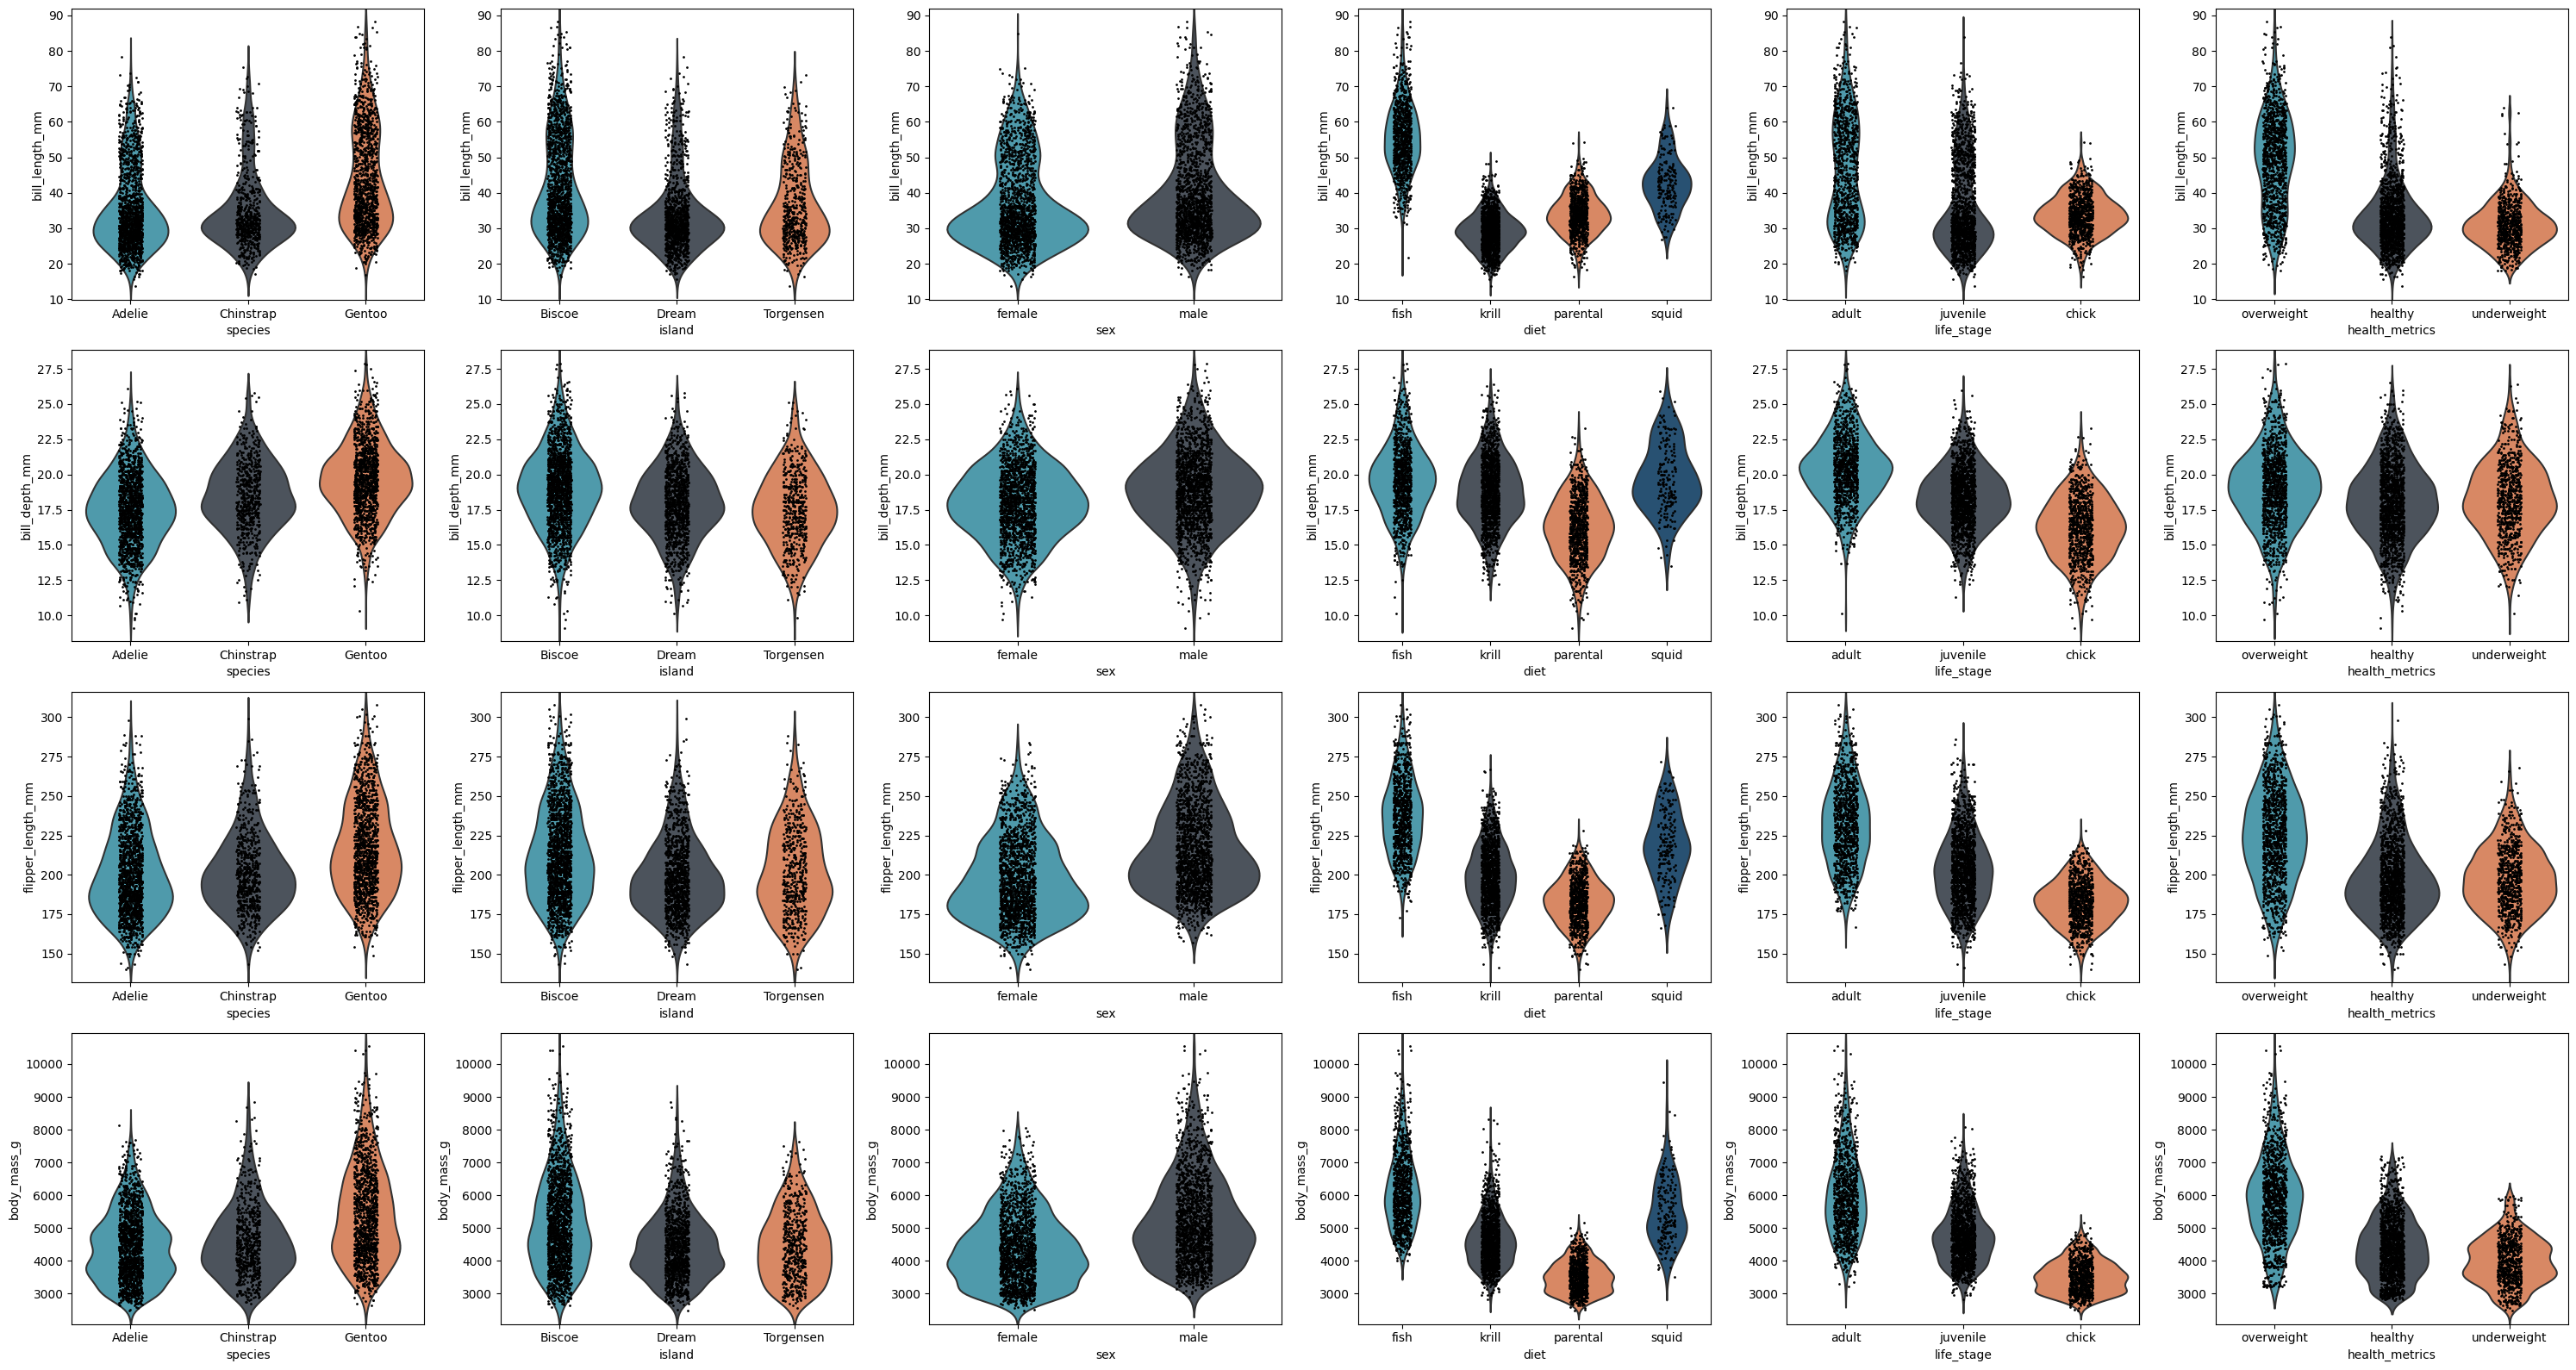

In [12]:
# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=len(categorical_columns), figsize=(5 * len(categorical_columns), 4 * len(numerical_columns)))

# Plotting the bean plots (approximation using violin plots and strip plots)
for i, num_col in enumerate(numerical_columns):
    for j, cat_col in enumerate(categorical_columns):
        sns.violinplot(x=cat_col, y=num_col, data=df, ax=axes[i][j], palette=palette, inner=None)
        sns.stripplot(x=cat_col, y=num_col, data=df, ax=axes[i][j], color='k', size=2, jitter=True)

# Adjust the layout
plt.tight_layout()
plt.show()


<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **bean plot** is a data visualization technique that combines elements of a box plot and a scatter plot. It is used to represent the distribution of data and provides insights into its central tendency, spread, and individual data points. 
    
### Components of a Bean Plot:

- **Bean Shape**: The central part of the plot resembles a series of beans or overlapping density curves. Each bean represents the probability density of the data at different values along the x-axis. The width and overlap of beans indicate data density and distribution.

- **Box Plot Elements**: Often, box plot elements, such as median, quartiles, and potential outliers, are included within the bean plot to provide summary statistics.

### When to Use a Bean Plot:

- To visualize data distribution, especially when comparing multiple groups or categories.
- To display individual data points within the context of the distribution.
- To assess central tendency and spread while retaining information about individual data values.

### Advantages of Bean Plots:

- Combines the advantages of box plots (summary statistics) and scatter plots (individual data points).
- Offers a compact representation of data distribution while preserving granularity.
- Suitable for comparing multiple distributions and their individual data points.

### Limitations of Bean Plots:

- May be less familiar to non-technical audiences compared to traditional box plots.
- Overlapping beans can make interpretation challenging when dealing with dense data.

</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >PARETO CHARTS</div>

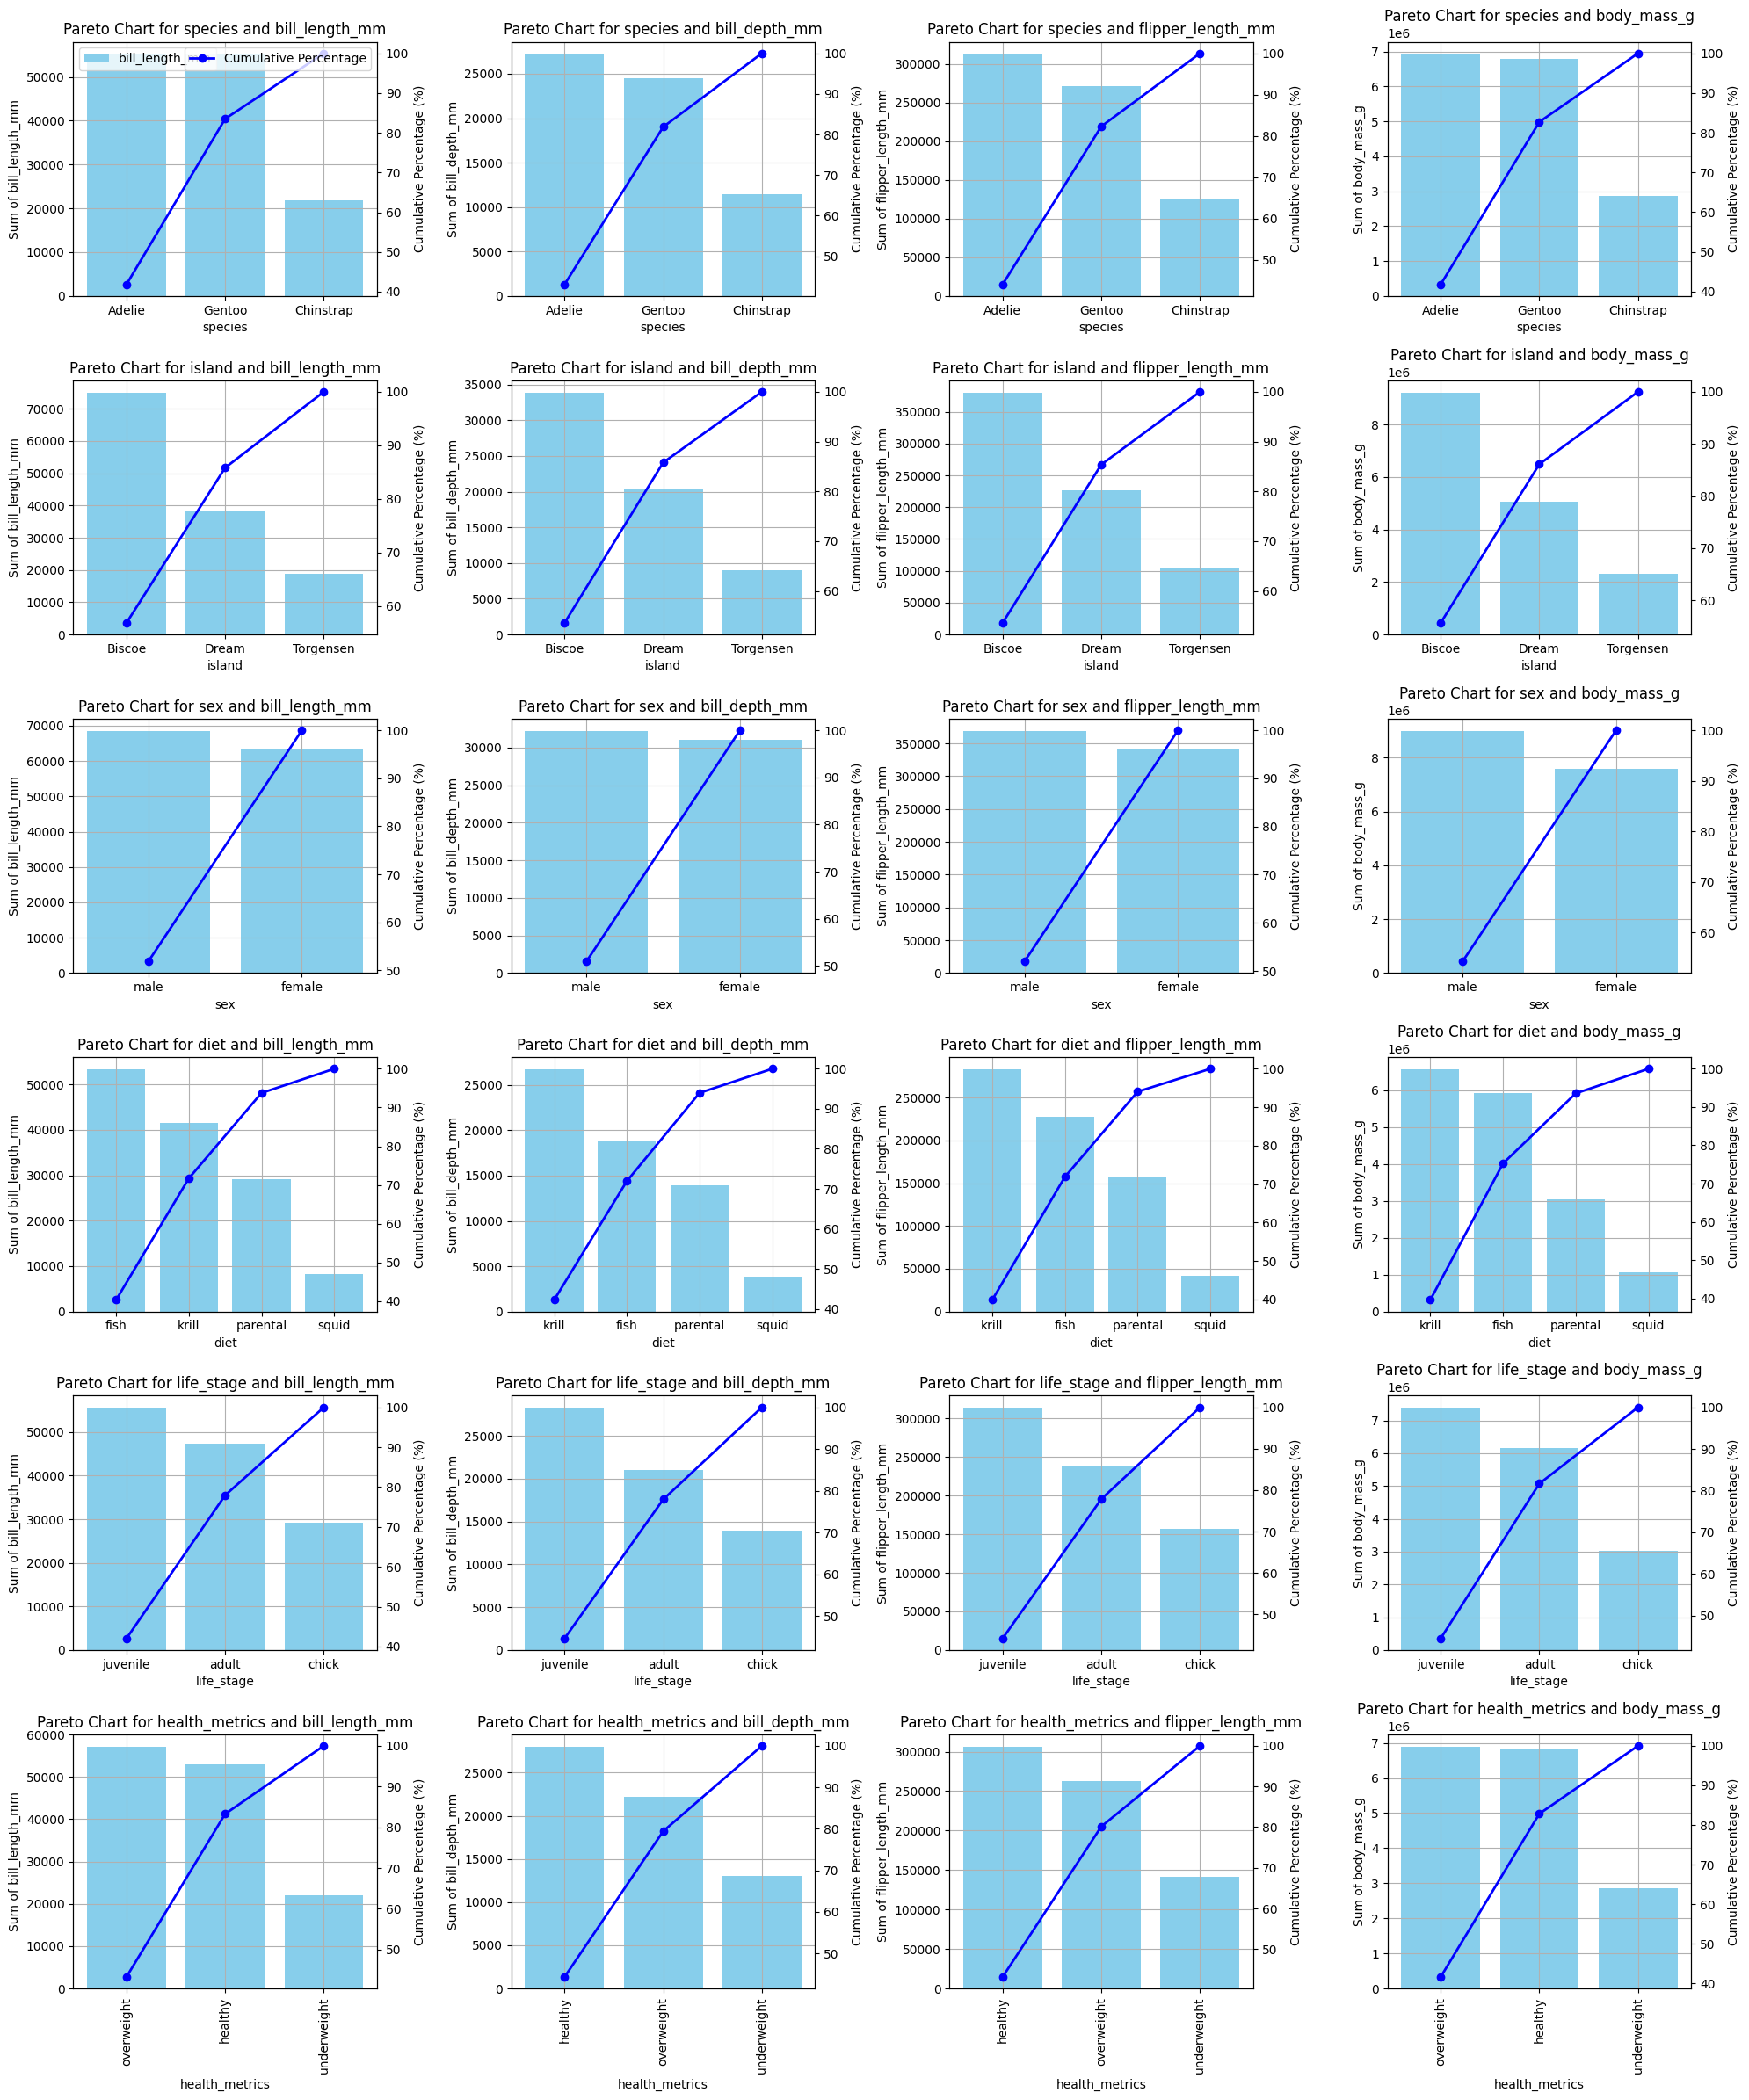

In [13]:
# Set up the matplotlib figure and axes based on the number of categorical and numerical columns
fig, axs = plt.subplots(len(categorical_columns), len(numerical_columns), 
                        figsize=(5 * len(numerical_columns), 4 * len(categorical_columns)), 
                        squeeze=False) # squeeze=False is important for consistency in axs dimensions

# Iterate over each subplot to populate it
for i, cat_col in enumerate(categorical_columns):
    for j, num_col in enumerate(numerical_columns):
        # Access the specific subplot
        ax1 = axs[i, j] if len(numerical_columns) > 1 else axs[i]
        
        # Prepare the data
        data = df.groupby(cat_col)[num_col].sum().sort_values(ascending=False)
        cumulative_percentage = (data.cumsum() / data.sum()) * 100
        
        # Create the bar chart on the primary y-axis
        ax1.bar(data.index, data, color='skyblue', label=num_col)

        # Create a secondary y-axis for the cumulative percentage line chart
        ax2 = ax1.twinx()
        ax2.plot(data.index, cumulative_percentage, color='blue', marker='o', linestyle='-', linewidth=2, label='Cumulative Percentage')

        # Set x-axis and primary y-axis labels and titles
        ax1.set_xlabel(cat_col)
        ax1.set_ylabel(f'Sum of {num_col}')
        ax1.set_title(f'Pareto Chart for {cat_col} and {num_col}')
        
        # Set secondary y-axis label
        ax2.set_ylabel('Cumulative Percentage (%)')

        # Rotate the x-axis labels for readability if this is the last row in the subplot grid
        if i == len(categorical_columns) - 1:
            ax1.tick_params(axis='x', rotation=90)

        # Only show legend on the first subplot to avoid repetition
        if i == 0 and j == 0:
            ax1.legend(loc='upper left')
            ax2.legend(loc='upper right')
            
        # Add gridlines for clarity
        ax1.grid(True)

# Adjust layout for a clean look considering the figure has multiple subplots
plt.tight_layout()

# Display the plot
plt.show()

### Plotly

In [14]:
# Calculate the number of rows and columns for subplots based on available columns
num_rows = len(categorical_columns)
num_cols = len(numerical_columns)

# Create a subplot figure
fig = make_subplots(rows=num_rows, cols=num_cols, 
                    specs=[[{'secondary_y': True}] * num_cols] * num_rows)

# Fill the subplots
for i, cat_col in enumerate(categorical_columns):
    for j, num_col in enumerate(numerical_columns):
        # Calculate data and cumulative percentage
        data = df.groupby(cat_col)[num_col].sum().sort_values(ascending=False)
        cumulative_percentage = data.cumsum() / data.sum() * 100

        # Add bar chart to subplot
        fig.add_trace(go.Bar(x=data.index, y=data, name=f'Sum of {num_col}', marker_color='skyblue'),
                      row=i+1, col=j+1, secondary_y=False)

        # Add line chart for cumulative percentage to the same subplot
        fig.add_trace(go.Scatter(x=data.index, y=cumulative_percentage, name='Cumulative Percentage', 
                                 marker_color='blue', mode='lines+markers'),
                      row=i+1, col=j+1, secondary_y=True)

# Update layout properties once, outside the loop
fig.update_layout(
    title='Pareto Charts for Categorical and Numerical Columns',
    xaxis_title='Category',
    yaxis_title='Sum',
    height=370 * len(numerical_columns), width=275 * len(categorical_columns), 
    showlegend=False,
    barmode='group',
)
# Update y-axes labels
for i, cat_col in enumerate(categorical_columns):
    for j, num_col in enumerate(numerical_columns):
        fig.update_yaxes(title_text=f'Sum of {num_col}', secondary_y=False, row=i+1, col=j+1)
        fig.update_yaxes(title_text='Cumulative Percentage (%)', secondary_y=True, row=i+1, col=j+1)

# Rotate x-axis labels and set grid for each subplot if needed
for axis in fig['layout']:
    if 'xaxis' in axis:
        fig['layout'][axis]['tickangle'] = 90
        fig['layout'][axis]['gridwidth'] = 1

# Show figure
fig.show()

<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **Pareto chart** is a graphical tool used to prioritize and display the most significant factors contributing to a particular issue or problem. It combines both bar chart and line chart elements to highlight the relative importance of different categories or causes.



### Components of a Pareto Chart:

- **Bars**: The bars in a Pareto chart represent different categories or causes, sorted in descending order of frequency, impact, or importance. The height of each bar corresponds to the frequency or count of occurrences.

- **Line Chart**: A cumulative percentage line chart is often superimposed on the bars. It shows the cumulative percentage of the total represented by the categories. This line helps identify the point where a significant portion of the total is concentrated.

### When to Use a Pareto Chart:

- To identify and prioritize the most critical factors contributing to a problem or situation.
- To focus resources and efforts on addressing the most impactful issues first.
- To visually communicate the distribution of a problem's root causes.

### Advantages of Pareto Charts:

- Offers a visual representation of the "80/20 rule," where a small number of factors often account for a large portion of the problem.
- Helps in decision-making by directing attention to the most significant issues.
- Provides a clear and concise summary of data, making it easy to understand.

### Limitations of Pareto Charts:

- May not be suitable for situations where all factors are equally important or difficult to quantify.
- Requires careful data collection and categorization for accurate results.

</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >DENSITY PLOTS</div>

### Seaborn

<Figure size 1500x3000 with 0 Axes>

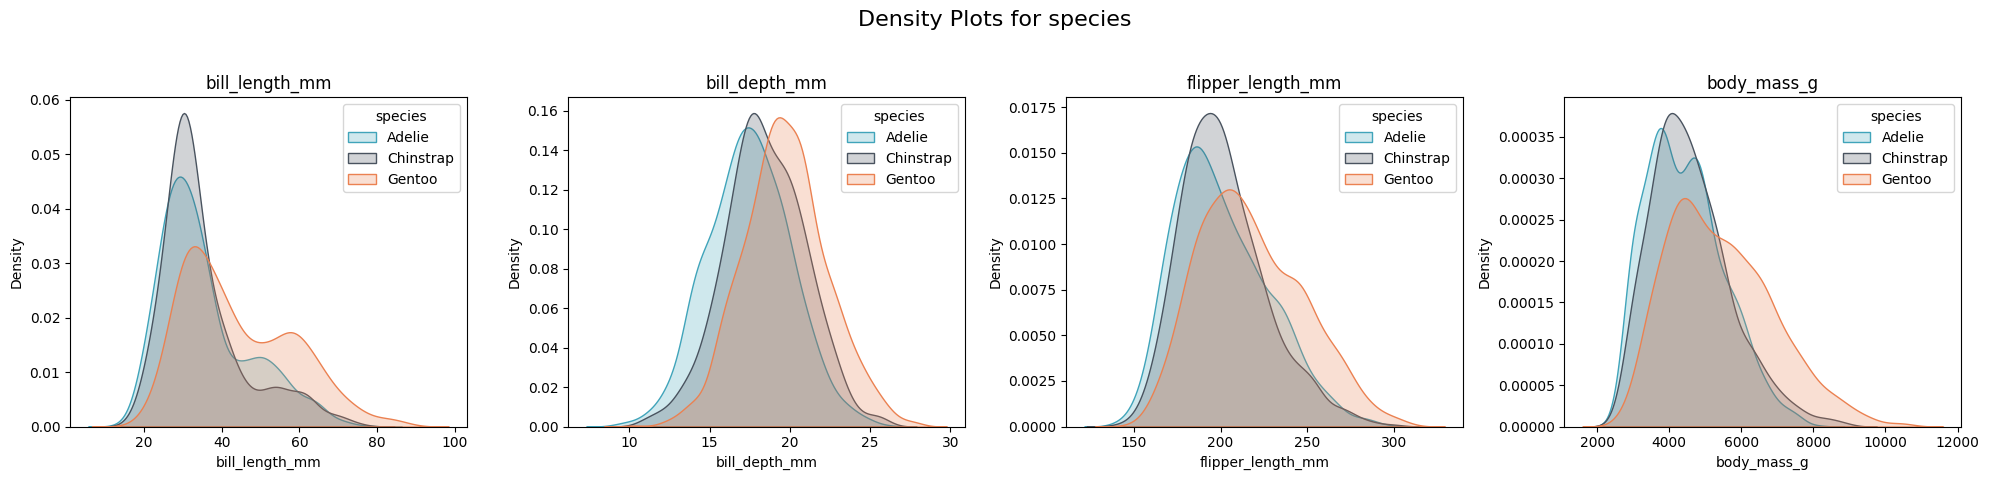

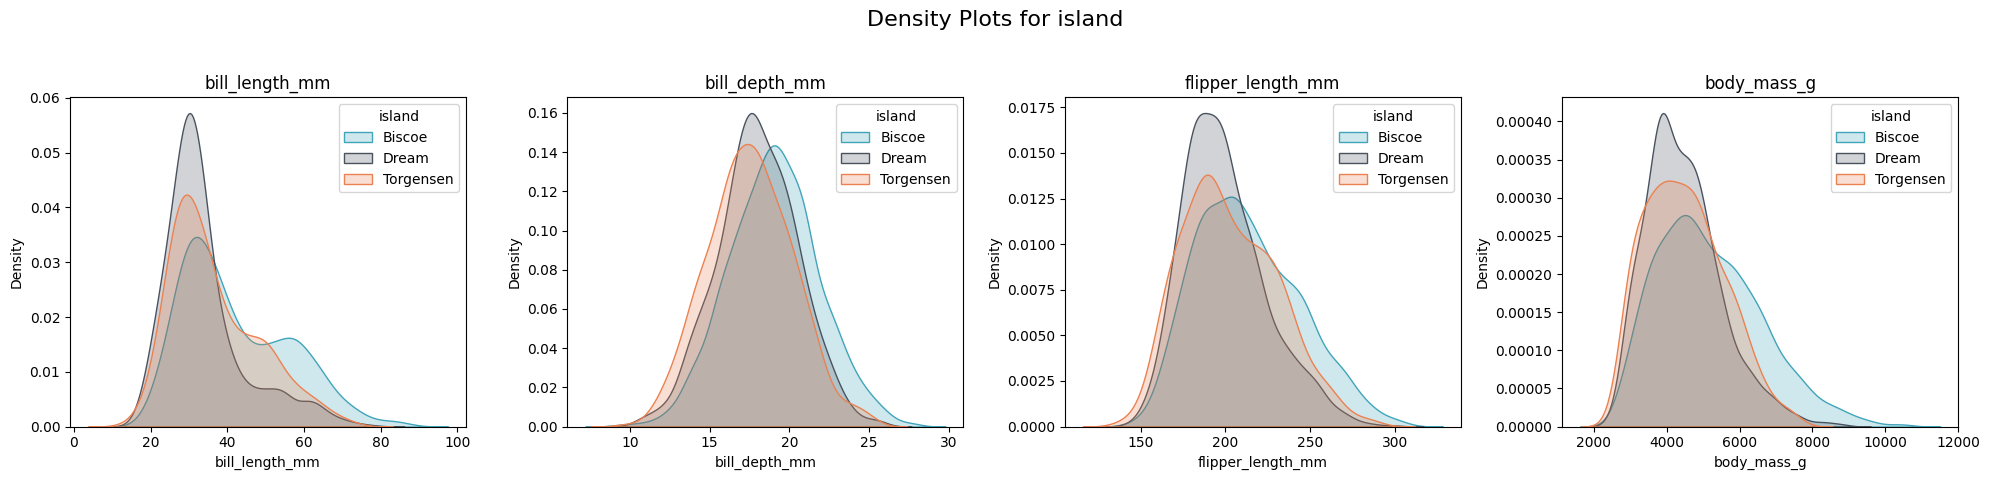

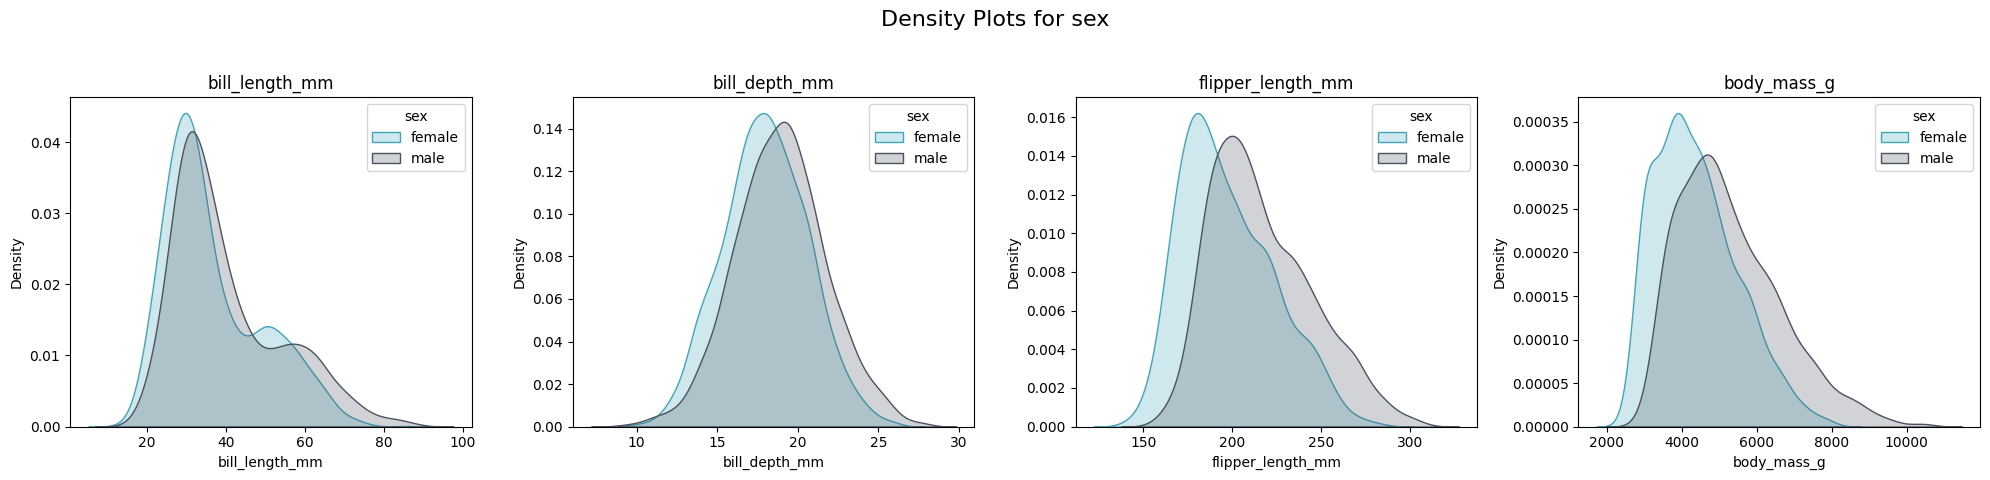

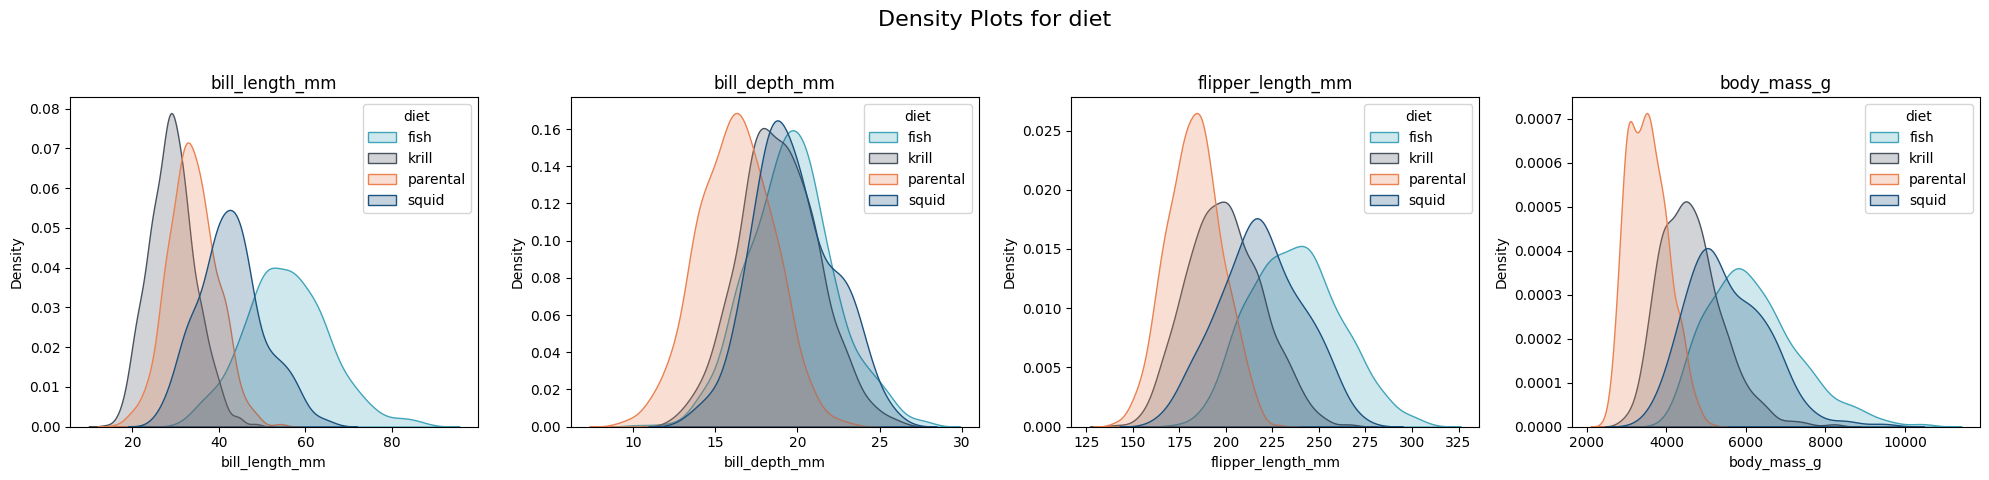

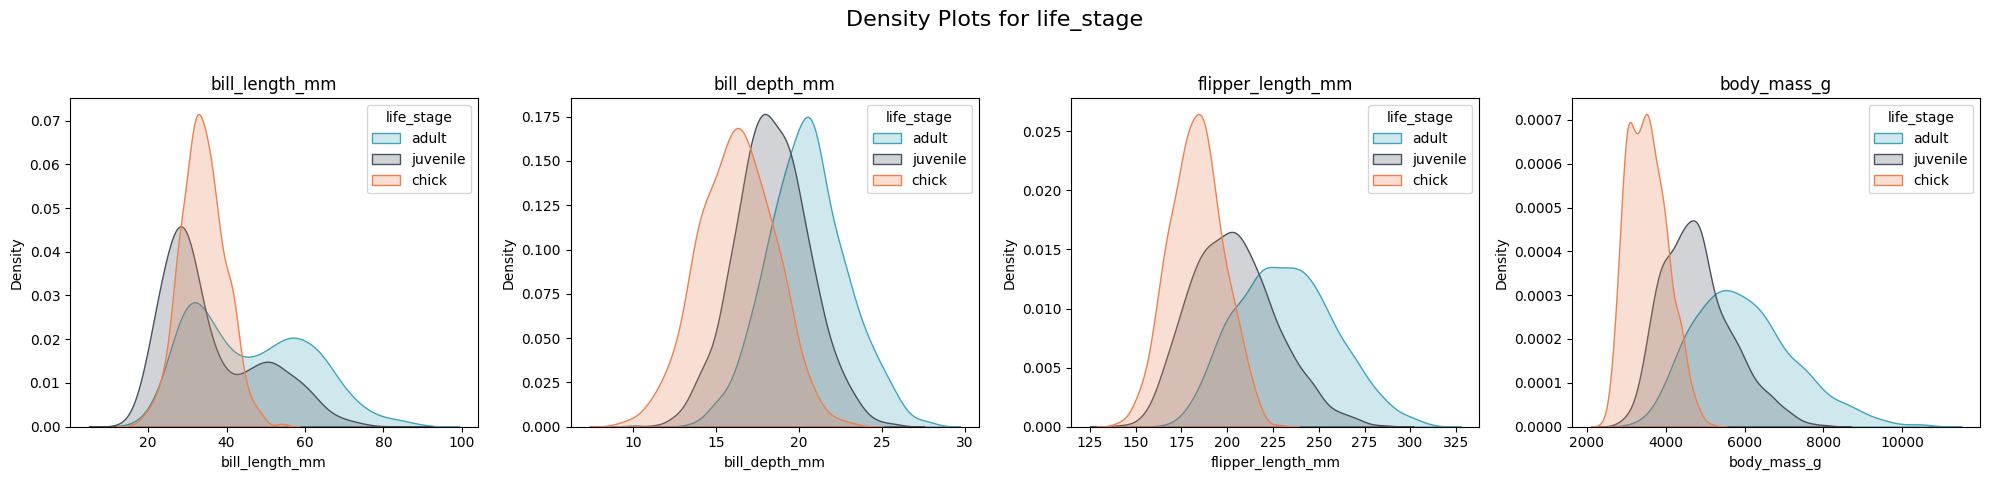

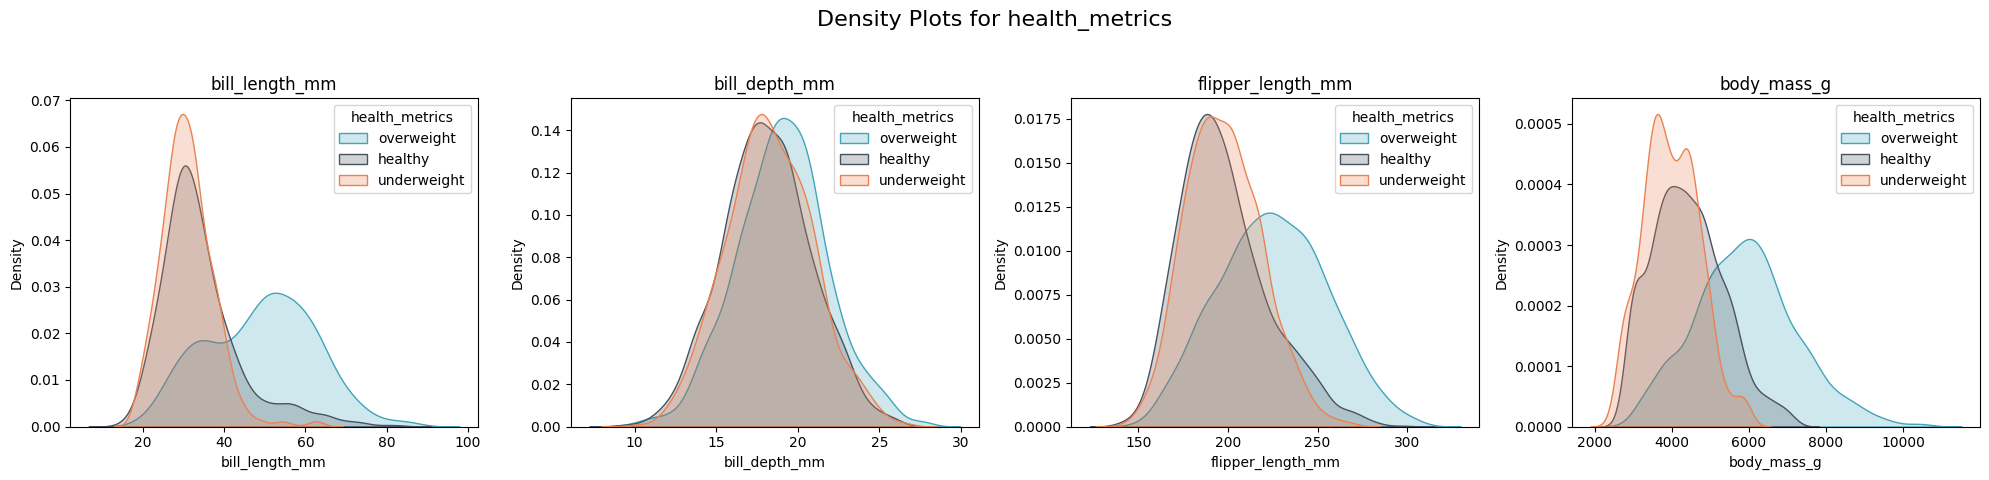

In [15]:
# Set the overall size of the grid
plt.figure(figsize=(15, 5 * len(categorical_columns)))

# Loop over each categorical column
for i, cat_col in enumerate(categorical_columns):
    # Create a new row of subplots for this categorical column
    # Each numerical variable will have its own subplot in this row
    fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5), sharex=False, sharey=False)

    # Set a title for the row
    fig.suptitle(f'Density Plots for {cat_col}', fontsize=16)

    # Loop through each subplot and plot the density plots for each category within the categorical variable
    for j, num_col in enumerate(numerical_columns):
        ax = axes[j]  # This is the axis for the subplot
        categories = df[cat_col].unique()
        # Create a color cycle iterator from our palette, repeating the palette if there are more categories than colors
        color_cycle = iter(palette * (len(categories) // len(palette) + 1))  
        for category in categories:
            subset = df[df[cat_col] == category]
            sns.kdeplot(subset[num_col], ax=ax, label=str(category), shade=True, color=next(color_cycle))  # Use next() to get the next color in the cycle
        ax.set_title(f'{num_col}')
        ax.legend(title=cat_col)
    
    # Adjust the layout of each row of subplots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

### Plotly

In [16]:
# Calculate the number of rows and columns for the subplots
num_rows = len(categorical_columns)
num_cols = len(numerical_columns)

# Create a subplot figure with given row and column count
fig = make_subplots(rows=num_rows, cols=num_cols, 
                    subplot_titles=[f'{num} Distribution per {cat}' for cat in categorical_columns for num in numerical_columns],
                    shared_yaxes=False)

# Populate the figure with a KDE plot for each category in each subplot
for i, cat_col in enumerate(categorical_columns):
    categories = df[cat_col].unique()
    for j, num_col in enumerate(numerical_columns):
        # Go through each category and add a trace
        for k, category in enumerate(categories):
            # Filter the dataframe for the category and plot
            subset = df[df[cat_col] == category]
            fig.add_trace(
                go.Histogram(x=subset[num_col], 
                             nbinsx=30, # Adjust the number of bins for your specific dataset
                             name=f'{category}', 
                             opacity=0.6,
                             marker_color=palette[k % len(palette)]), # Use modulo for cycling through palette
                row=i+1, col=j+1
            )

# Update layout if needed, here setting titles and showing legend in unified style
fig.update_layout(title_text="Density Plots with Plotly", showlegend=True,
                 height=370 * len(numerical_columns), width=275 * len(categorical_columns), barmode='group')
# Adjust axes and grid properties if needed
for i in range(1, num_rows+1):
    for j in range(1, num_cols+1):
        fig.update_xaxes(title_text=numerical_columns[j-1], row=i, col=j)
        fig.update_yaxes(title_text="Density", row=i, col=j)

# Update the traces to be displayed as a KDE (density)
fig.update_traces(histnorm='probability density')

# Show the figure
fig.show()

<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **density chart** is a data visualization technique used to represent the distribution of data in a continuous and smooth manner. It is especially useful for visualizing the probability density function of a dataset, showing how data points are distributed across different values. 

### When to Use a Density Chart:

- To visualize the distribution of continuous data.
- To understand the shape and characteristics of the data distribution.
- To identify modes (peaks), central tendency, and spread in the data.

### Advantages of Density Charts:

- Provides a continuous and smooth representation of data distribution.
- Helps identify multimodal distributions, skewness, and fine details in the data.
- Suitable for understanding the underlying distribution when dealing with large datasets.

### Limitations of Density Charts:

- May require statistical knowledge for interpretation, especially when comparing different density charts.
- Not as suitable for displaying individual data points, which are better represented in scatterplots or histograms.


</div>

## <div style="font-family: Futura; letter-spacing: 3px; color: #000000; font-size: 80%; text-align: left; padding: 16px 16px 16px 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(0, 0, 0, 0.02) 0px 1px 3px 0px, rgba(27, 31, 35, 0.15) 0px 0px 0px 1px; margin-top:-10px;margin-bottom:-30px" >RADAR CHARTS</div>

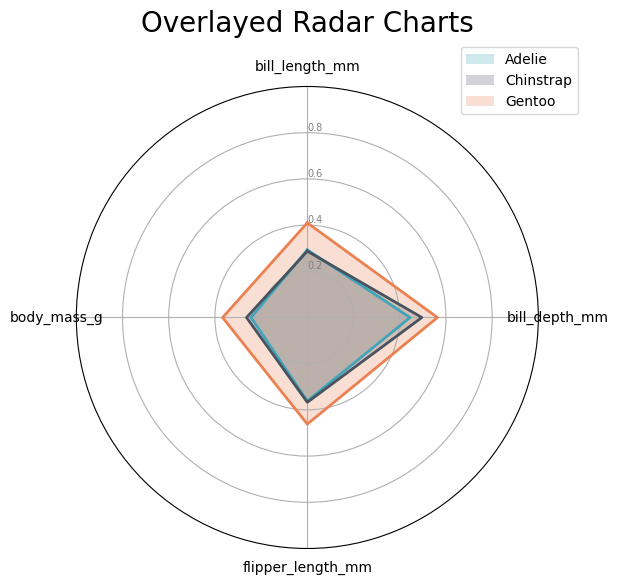

In [17]:
from sklearn.preprocessing import MinMaxScaler
from math import ceil
from math import pi
from matplotlib.patches import Patch

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)
df_scaled[categorical_columns] = df[categorical_columns]  # Add the categorical data back into the scaled DataFrame

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_columns = ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']

# Adjusted function to plot overlaying radar charts
def create_overlayed_radar_chart(data, categories, numerical_columns):
    num_vars = len(numerical_columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], numerical_columns)
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    plt.ylim(0, 1)

    # Color setup for each category
    colors = palette
    legend_patches = []  # Collect legend patches

    for i, category in enumerate(categories):
        filtered_data = data[data[categorical_columns[0]] == category]
        values = filtered_data[numerical_columns].mean().tolist()
        values += values[:1]  # Complete the loop to close the radar chart

        # Plot the radar chart
        ax.plot(angles, values, color=colors[i % len(colors)], linewidth=2, linestyle='solid')
        ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.25)

        # Add legend patch
        legend_patches.append(Patch(facecolor=colors[i % len(colors)], label=category, alpha=0.25))

    # Add legend outside the plot area
    plt.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.title('Overlayed Radar Charts', size=20, y=1.1)
    plt.show()

# Use the adjusted function for plotting
unique_categories = df_scaled['species'].unique()
create_overlayed_radar_chart(df_scaled, unique_categories, numerical_columns)

<div style="padding: 20px; border-radius: 12px; margin: 4px; box-shadow: rgba(50, 50, 93, 0.25) 0px 2px 5px -1px, rgba(0, 0, 0, 0.3) 0px 1px 3px -1px; " >

A **radar chart**, also known as a spider chart or web chart, is a data visualization tool used to display multivariate data in a two-dimensional, circular format. It is particularly useful for comparing the performance or characteristics of different categories or variables across multiple dimensions. Here's an explanation of a radar chart:

### Components of a Radar Chart:

- **Axes**: A radar chart typically consists of a set of axes radiating outward from a central point, like spokes on a wheel. These axes represent different variables or dimensions being compared. The number of axes corresponds to the number of variables you want to visualize.

- **Data Points**: Data points are plotted along each axis, indicating the value of each variable for a specific category or entity. These data points are connected by lines to create a polygon or shape within the chart.

- **Central Point**: The central point where all axes intersect is the origin of the radar chart. It represents a baseline or zero value for all variables.

### When to Use a Radar Chart:

- **Comparing Multiple Categories**: Radar charts are useful when you want to compare the performance or characteristics of different categories or entities across several dimensions. For example, you might use a radar chart to compare the strengths and weaknesses of different products or evaluate the skills of individuals in various areas.

- **Highlighting Patterns**: Radar charts can help highlight patterns and trends in multivariate data. They are especially effective when there is a need to emphasize relative strengths and weaknesses across different variables.

- **Visualizing Profiles**: They are suitable for visualizing profiles or "fingerprints" of entities with respect to various attributes. For instance, you can use a radar chart to represent the fitness levels of athletes across different physical attributes like strength, endurance, and agility.

### Advantages of Radar Charts:

- Provides a clear visual representation of multivariate data in a single chart.
- Allows for easy comparison of categories or entities across multiple dimensions.
- Highlights relative strengths and weaknesses in a visually intuitive way.

### Limitations of Radar Charts:

- Can become cluttered and difficult to interpret when there are too many variables or categories.
- Comparisons may be less precise compared to other chart types like bar charts or scatter plots.
- Interpretation can be challenging when the scales of the variables differ significantly.


</div>

![Imgur](https://i.imgur.com/yzroo3h.png)